# Laboratorio 2

**Andres Chaparro - 202111146** 

**Juan Esteban Lopez Ulloa - 202021417**

**Juan Diego Lozano Guerrero - 202122869**

In [82]:
import numpy as np
import pandas as pd

from joblib import dump, load

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,silhouette_samples, silhouette_score

import scipy.stats as stats

# 1. Carga de datos (csv)
Se cargan la base de datos (CSV) para trabajar con estos

In [83]:
direccionTrain = '202510_Laboratorio 2 - Agrupación_Customer_Data.csv'

data_original = pd.read_csv(direccionTrain, sep=";", encoding="latin1")
data_original.shape   


(8950, 18)

In [84]:
data_original.head()

,ID,SALDO,F_SALDO,COMPRAS,COMPRAS_PUNTUALES,COMPRAS_PLAZOS,AVANCE_EFECTIVO,F_COMPRAS,F_COMPRAS_PUNTUALES,F_COMPRAS_PLAZOS,F_AVANCE_EFECTIVO,P_AVANCE_EFECTIVO,P_COMPRAS,LÍMITE_CREDITO,PAGOS,PAGOS_MINIMOS,F_PAGOS_COMPLETOS,MESES_CLIENTE
0,C10001,5323.148883,0.250693,26344.07220,38237.442520,3727.113162,15708.239680,0.496536,0.464442,0.821611,0.194502,100,77,16819.48004,21337.027460,39452.95812,0.817907,7
1,C10002,12726.638120,0.791307,37958.51902,5690.742440,18733.810960,38284.354430,0.699457,0.250327,0.654863,1.083902,78,156,15617.57058,8000.183624,63013.74848,0.343119,9
2,C10003,4305.572068,0.176531,28392.95334,36009.470090,2873.383232,14294.185030,0.419764,0.523662,0.899912,0.207049,72,81,15515.58621,27111.360490,NaN,0.829074,6
3,C10004,4740.988511,0.178076,27399.00384,38246.863490,3402.853375,6936.812518,0.439666,0.606597,0.783129,0.228299,78,83,12926.58797,23919.113400,38444.21998,0.883984,7
4,C10005,13820.920640,0.826914,42214.02163,7341.007821,19273.070990,40091.347850,0.821412,0.283579,0.501361,1.106350,88,182,14404.70507,6994.688474,62041.61734,0.383186,10


# 2. Entendimientos de los datos 

In [85]:
data_original.describe()

,SALDO,F_SALDO,COMPRAS,COMPRAS_PUNTUALES,COMPRAS_PLAZOS,AVANCE_EFECTIVO,F_COMPRAS,F_COMPRAS_PUNTUALES,F_COMPRAS_PLAZOS,F_AVANCE_EFECTIVO,P_AVANCE_EFECTIVO,P_COMPRAS,LÍMITE_CREDITO,PAGOS,PAGOS_MINIMOS,F_PAGOS_COMPLETOS,MESES_CLIENTE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,9382.387900,0.459205,30525.873439,22913.665720,11407.851805,22573.474202,0.559810,0.478032,0.623916,0.734946,76.169162,164.981453,14696.640361,19824.347218,44222.977795,0.545414,8.370615
std,5118.113559,0.282998,11041.410943,13573.919086,7087.102996,12594.295895,0.214055,0.221873,0.208207,0.422563,22.260935,71.322003,5537.074673,11069.268177,15468.314241,0.267443,1.756035
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,1006.064965,0.000000,6.000000
25%,4275.036859,0.188490,27106.651598,6698.252490,3736.720194,10944.431108,0.407273,0.250856,0.518231,0.230716,65.000000,97.000000,13487.727310,9329.603116,31572.127680,0.336732,7.000000
50%,12007.718810,0.306650,30934.582275,31011.033490,10832.141085,19465.792260,0.505305,0.533521,0.607608,0.947651,82.000000,176.000000,14942.545350,21367.621275,48780.271750,0.432690,8.000000
75%,13740.565878,0.756061,39825.160795,34495.416422,19127.083038,36150.722568,0.777084,0.649120,0.814929,1.029172,92.000000,216.000000,16269.727120,25219.127372,57761.175980,0.815178,10.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


### 2.1 Datos Nulos

In [86]:
features = data_original.columns
data_original[features].isnull().sum() 

ID                       0
SALDO                    0
F_SALDO                  0
COMPRAS                  0
COMPRAS_PUNTUALES        0
COMPRAS_PLAZOS           0
AVANCE_EFECTIVO          0
F_COMPRAS                0
F_COMPRAS_PUNTUALES      0
F_COMPRAS_PLAZOS         0
F_AVANCE_EFECTIVO        0
P_AVANCE_EFECTIVO        0
P_COMPRAS                0
LÍMITE_CREDITO           1
PAGOS                    0
PAGOS_MINIMOS          313
F_PAGOS_COMPLETOS        0
MESES_CLIENTE            0
dtype: int64

In [87]:
data_original[features].isnull().sum() /data_original.shape[0] * 100

ID                     0.000000
SALDO                  0.000000
F_SALDO                0.000000
COMPRAS                0.000000
COMPRAS_PUNTUALES      0.000000
COMPRAS_PLAZOS         0.000000
AVANCE_EFECTIVO        0.000000
F_COMPRAS              0.000000
F_COMPRAS_PUNTUALES    0.000000
F_COMPRAS_PLAZOS       0.000000
F_AVANCE_EFECTIVO      0.000000
P_AVANCE_EFECTIVO      0.000000
P_COMPRAS              0.000000
LÍMITE_CREDITO         0.011173
PAGOS                  0.000000
PAGOS_MINIMOS          3.497207
F_PAGOS_COMPLETOS      0.000000
MESES_CLIENTE          0.000000
dtype: float64

### 2.2 Histograma de los datos

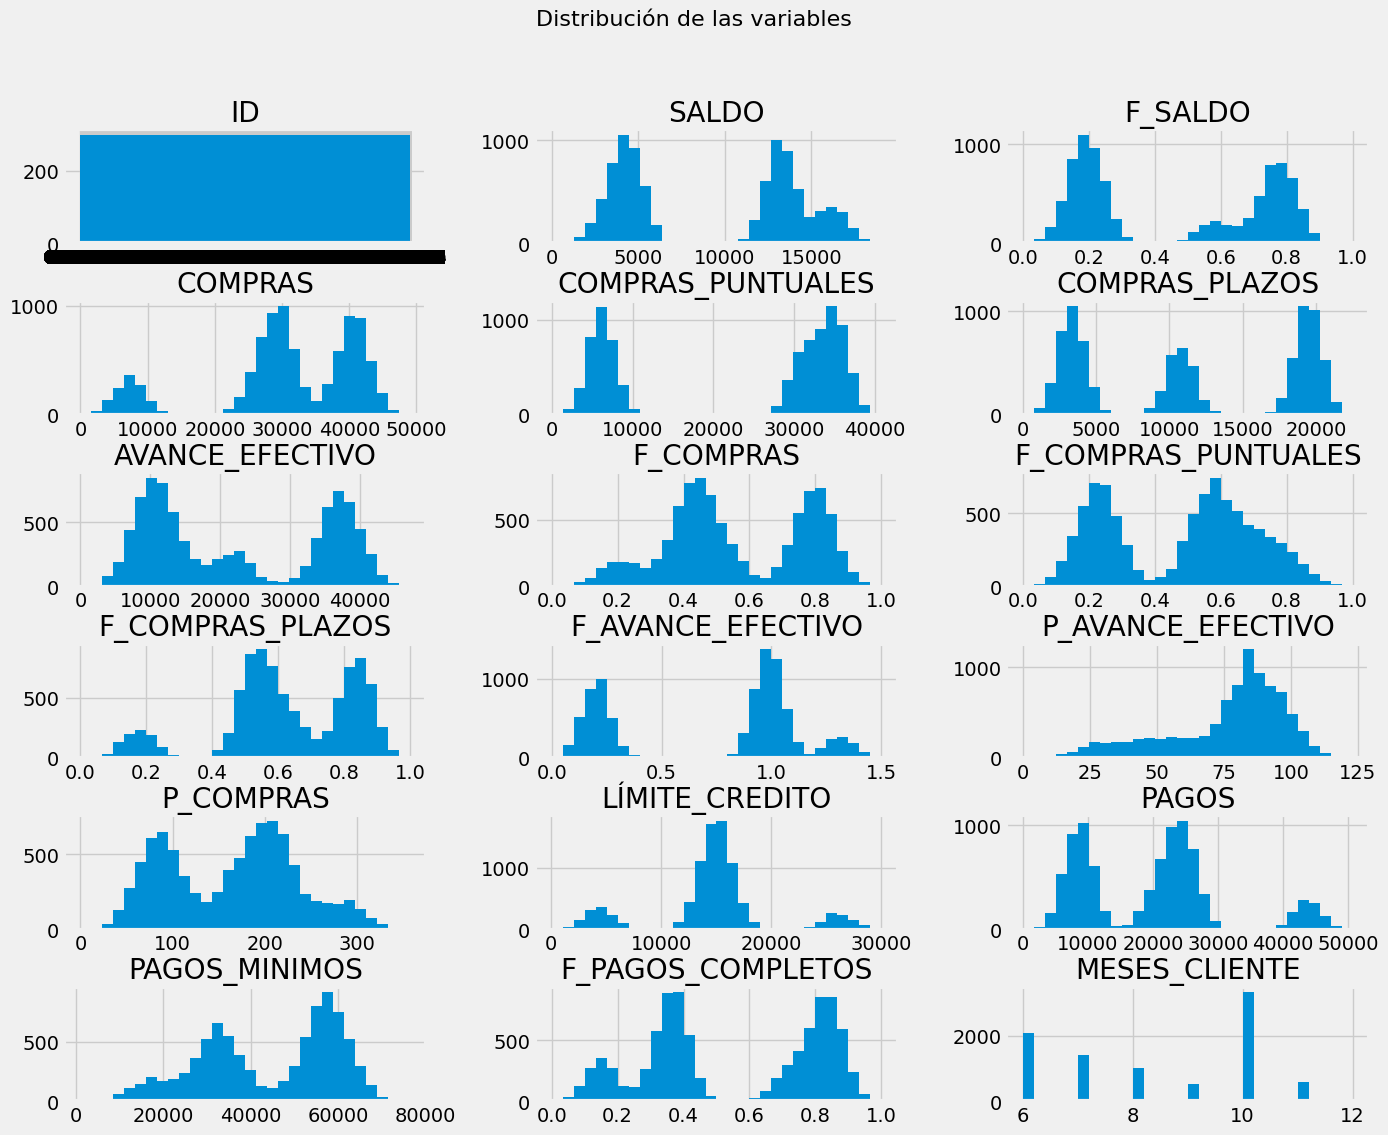

In [88]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(15, 12))  # 6 filas, 3 columnas
fig.subplots_adjust(hspace=0.5, wspace=0.3)  # Ajusta el espacio entre gráficos
# Iterar sobre cada variable y graficarla en el subplot correspondiente
for ax, col in zip(axes.flat, data_original.columns):
    data_original[col].hist(ax=ax, bins=30)
    ax.set_title(col)

plt.suptitle("Distribución de las variables", fontsize=16)
plt.show()


### 2.3 HeatMap de Correlaciones

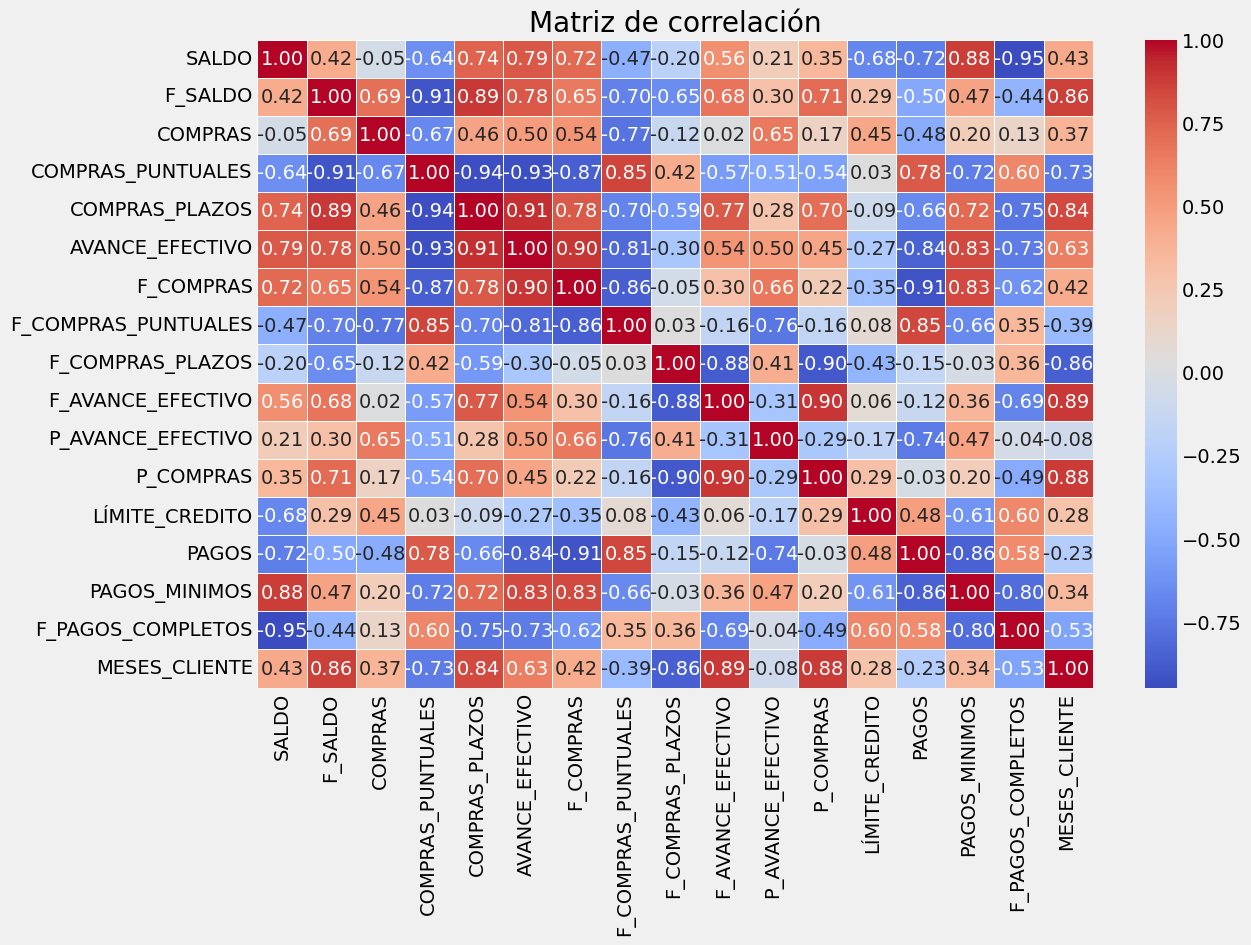

In [89]:
plt.figure(figsize=(12, 8))
sns.heatmap(data_original.drop(columns = ['ID']).corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de correlación")
plt.show()

# 3. Limpieza de datos

### 3.1 Selección de variables por información

Para la selección de variables, se eliminarán aquellas que son irrelevantes para los modelos, como las que contienen valores que no aportan nada de información como es el *ID*

In [90]:
datos_limpios1 = data_original.drop(columns=['ID'])

### 3.2 Limpieza de datos por datos nulos

In [91]:
nulos = data_original[features].isnull().sum()
nulos = nulos[nulos > 0]
nulos

LÍMITE_CREDITO      1
PAGOS_MINIMOS     313
dtype: int64

El histograma de la variable **PAGOS_MINIMOS** y **LIMITE_CREDITO** muestran una distribución diversa, lo que indica la presencia de dos grupos distintos de clientes con diferentes comportamientos de pago. En este caso, reemplazar los valores nulos con la **mediana** es la mejor opción, ya que es menos sensible a valores extremos y refleja mejor la tendencia central de los datos. Usar la media podría distorsionar la representación real debido a la posible presencia de valores atípicos en los extremos de la distribución.

In [92]:
datos_limpios2 = datos_limpios1.copy()
datos_limpios2["LÍMITE_CREDITO"] = datos_limpios1["LÍMITE_CREDITO"].fillna(datos_limpios1["LÍMITE_CREDITO"].median())
datos_limpios2["PAGOS_MINIMOS"] = datos_limpios1["PAGOS_MINIMOS"].fillna(datos_limpios1["PAGOS_MINIMOS"].median())


### 3.3 Limpieza de Outliers

In [93]:
import numpy as np
import pandas as pd

# Función para contar outliers usando IQR
def contar_outliers_iqr(df):
    outliers_por_variable = {}
    
    for columna in df.select_dtypes(include=np.number):  # Solo variables numéricas
        Q1 = df[columna].quantile(0.25)
        Q3 = df[columna].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR

        outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]
        outliers_por_variable[columna] = len(outliers)
    
    return outliers_por_variable

# Contar outliers en cada variable de datos_limpios2
outliers = contar_outliers_iqr(datos_limpios2)

# Mostrar resultados en un DataFrame
df_outliers = pd.DataFrame(outliers.items(), columns=["Variable", "Cantidad de Outliers"])
df_outliers


,Variable,Cantidad de Outliers
0,SALDO,0
1,F_SALDO,0
2,COMPRAS,755
3,COMPRAS_PUNTUALES,0
4,COMPRAS_PLAZOS,0
5,AVANCE_EFECTIVO,0
6,F_COMPRAS,0
7,F_COMPRAS_PUNTUALES,0
8,F_COMPRAS_PLAZOS,19
9,F_AVANCE_EFECTIVO,0


En el proceso de limpieza de datos, decidimos eliminar únicamente las variables **PAGOS** y **F_COMPRAS_PLAZOS**, ya que presentaban un número muy reducido de outliers (5 y 19, respectivamente). Dado que estamos aplicando **aprendizaje no supervisado** para la clasificación, es fundamental **preservar la mayor cantidad de información posible**, evitando eliminar datos que podrían representar grupos importantes dentro del conjunto. Las variables con un número significativo de outliers, como **COMPRAS (755), P_AVANCE_EFECTIVO (253) y LÍMITE_CREDITO (2184),** se mantuvieron para no sesgar la distribución de los datos ni perder patrones relevantes en la agrupación.

In [94]:
import pandas as pd

# Función para eliminar outliers usando el método del IQR
def eliminar_outliers(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    filtro = (df[columna] >= (Q1 - 1.5 * IQR)) & (df[columna] <= (Q3 + 1.5 * IQR))
    return df[filtro]

datos_limpios3 = datos_limpios2.copy()
datos_limpios3 = eliminar_outliers(datos_limpios2, 'F_COMPRAS_PLAZOS')
datos_limpios3 = eliminar_outliers(datos_limpios3, 'PAGOS')
datos_limpios3.shape, datos_limpios2.shape

((8926, 17), (8950, 17))

### 3.4 Transformacion

Para garantizar que todas las variables tengan la misma escala y evitar que aquellas con valores más grandes dominen el análisis, aplicamos **StandardScaler**, una técnica de normalización que estandariza los datos restando la media y dividiendo por la desviación estándar. Esto es especialmente importante en algoritmos de **aprendizaje no supervisado**, como los de agrupación, ya que mejora la comparación entre características y permite obtener clusters más representativos.

In [95]:
standard_scaler= StandardScaler()
df_prep_norm = standard_scaler.fit_transform(datos_limpios3)
df_prep_norm = pd.DataFrame(df_prep_norm, columns=datos_limpios3.columns)
df_prep_norm.describe()

,SALDO,F_SALDO,COMPRAS,COMPRAS_PUNTUALES,COMPRAS_PLAZOS,AVANCE_EFECTIVO,F_COMPRAS,F_COMPRAS_PUNTUALES,F_COMPRAS_PLAZOS,F_AVANCE_EFECTIVO,P_AVANCE_EFECTIVO,P_COMPRAS,LÍMITE_CREDITO,PAGOS,PAGOS_MINIMOS,F_PAGOS_COMPLETOS,MESES_CLIENTE
count,8.926000e+03,8.926000e+03,8.926000e+03,8.926000e+03,8.926000e+03,8.926000e+03,8.926000e+03,8.926000e+03,8.926000e+03,8.926000e+03,8.926000e+03,8.926000e+03,8.926000e+03,8.926000e+03,8.926000e+03,8.926000e+03,8.926000e+03
mean,2.264726e-16,-1.114452e-17,-3.920483e-17,6.806117e-17,-2.228904e-16,2.129399e-17,1.600035e-16,2.013974e-16,9.950464e-17,-3.502563e-17,2.417963e-16,4.059789e-17,-3.052802e-16,-8.398192e-17,-4.306561e-16,-2.216963e-16,4.457808e-17
std,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00
min,-1.837957e+00,-1.619928e+00,-2.762734e+00,-1.685134e+00,-1.608108e+00,-1.795791e+00,-2.625132e+00,-2.154304e+00,-2.667987e+00,-1.737861e+00,-3.445433e+00,-2.314579e+00,-2.651218e+00,-1.795352e+00,-2.862248e+00,-2.036286e+00,-1.347844e+00
25%,-9.998821e-01,-9.552775e-01,-3.084603e-01,-1.192377e+00,-1.082422e+00,-9.256145e-01,-7.144143e-01,-1.022730e+00,-5.160465e-01,-1.191648e+00,-4.650855e-01,-9.511681e-01,-2.145337e-01,-9.485561e-01,-8.251998e-01,-7.791141e-01,-7.778774e-01
50%,5.157115e-01,-5.481864e-01,3.788188e-02,5.979184e-01,-8.037993e-02,-2.423381e-01,-2.572645e-01,2.513693e-01,-8.219141e-02,5.070369e-01,2.574230e-01,1.592385e-01,4.895642e-02,1.450644e-01,2.853591e-01,-4.228375e-01,-2.079107e-01
75%,8.494450e-01,1.049542e+00,8.427361e-01,8.543731e-01,1.088578e+00,1.076061e+00,1.013638e+00,7.692637e-01,9.196558e-01,6.992209e-01,7.089908e-01,7.074139e-01,2.884498e-01,4.930115e-01,8.630785e-01,1.010363e+00,9.320225e-01
max,1.885748e+00,1.909880e+00,1.673926e+00,1.315279e+00,1.562770e+00,1.948149e+00,2.056615e+00,2.360557e+00,1.814180e+00,1.816679e+00,2.108851e+00,2.717390e+00,2.781169e+00,2.653225e+00,2.105496e+00,1.700263e+00,2.071956e+00


# 4. Modelo de K-means (Andres)

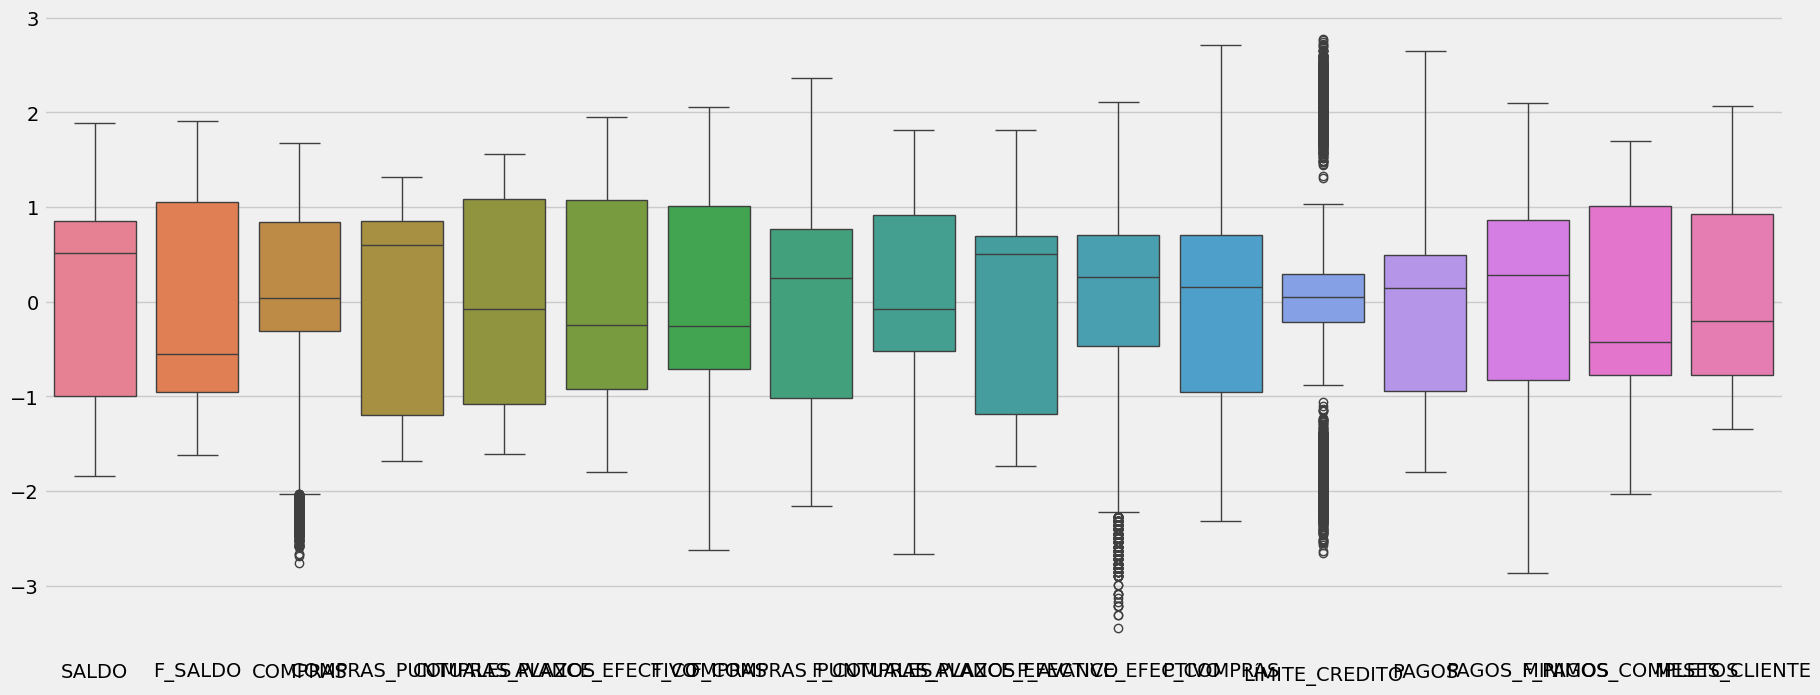

In [96]:
fig=plt.figure(figsize=(20,8))
ax = sns.boxplot(data=df_prep_norm, orient="v")

In [97]:
def plot_distortion(data,
                    k_min=1, 
                    k_max=11,
                    ylabel = 'Distortion',
                    xlabel = 'Number of clusters',
                    title = 'Distortion Plot'):
    '''
    Graficar el codo de los clusters
    
    Parametros
    ----------
    data : np.array
        El arreglo con los datos
    k_min : int
        Valor mínimo para k
    k_max : int
        Valor máximo para k
    xlabel : string
        La etiqueta del eje x
    ylabel  string
        La etiqueta del eje y    
    title : string
        El titulo de la gráfica  
    '''
    distortions = []
    for i in range(k_min, k_max):
        km = KMeans(n_clusters=i,
                 init='k-means++',
                 n_init=10,
                 max_iter=300,
                 random_state=0)
        km.fit(data)
        distortions.append(km.inertia_)
    plt.plot(range(k_min,k_max), distortions, marker='o')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

Para determinar el número óptimo de clusters en **K-Means**, utilizamos el **método del codo**, que grafica la distorsión en función del número de clusters. En la gráfica obtenida, observamos que la reducción de la distorsión es más pronunciada hasta **k = 4**, a partir de donde el cambio se vuelve menos significativo. Esto indica que **4 clusters** es una elección adecuada, ya que captura bien la estructura de los datos sin agregar complejidad innecesaria.

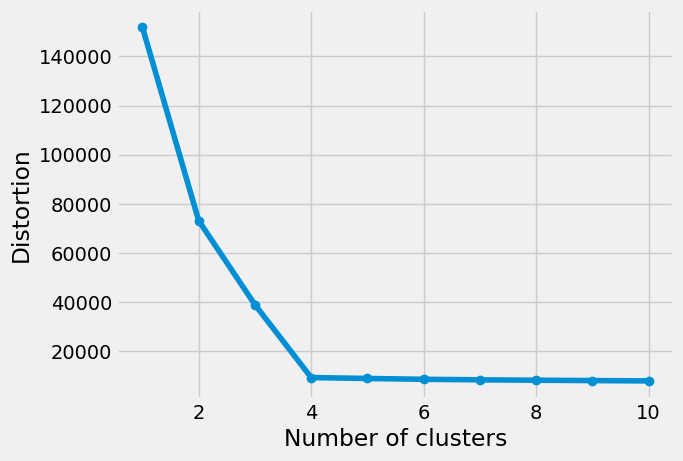

In [98]:
plot_distortion(df_prep_norm,1,11)

In [99]:
# Identificar el valor de K, utilizando ahora el valor de la silueta

def plot_selectK_silhoute(data,
                    k_min=1, 
                    k_max=11,
                    ylabel = 'Silhouette Coefficient',
                    xlabel = 'Number of clusters',
                    style = 'fivethirtyeight'):
    '''
    Graficar el codo de los clusters
    
    Parametros
    ----------
    data : np.array
        El arreglo con los datos
    k_min : int
        Valor mínimo para k
    k_max : int
        Valor máximo para k
    xlabel : string
        La etiqueta del eje x
    ylabel  string
        La etiqueta del eje y    
    title : string
        El titulo de la gráfica  
    '''
    # Crear una lista para almacenar los coeficientes de la silueta para cada valor de k analizado

    silhouette_coefficients = []

    # Notice you start at 2 clusters for silhouette coefficient
    for k in range(k_min, k_max):
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(data)
        score = silhouette_score(data, kmeans.labels_)
        silhouette_coefficients.append(score)
    plt.style.use(style)
    plt.plot(range(k_min, k_max), silhouette_coefficients)
    plt.xticks(range(k_min, k_max))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()     


Para complementar la selección del número óptimo de clusters en **K-Means**, utilizamos el **coeficiente de silueta**, que mide la separación y cohesión de los clusters. En la gráfica obtenida, el valor máximo del coeficiente se encuentra en **k = 4**, lo que sugiere que esta es la mejor elección, ya que indica una mayor separación entre los clusters y una mejor estructura en la agrupación.

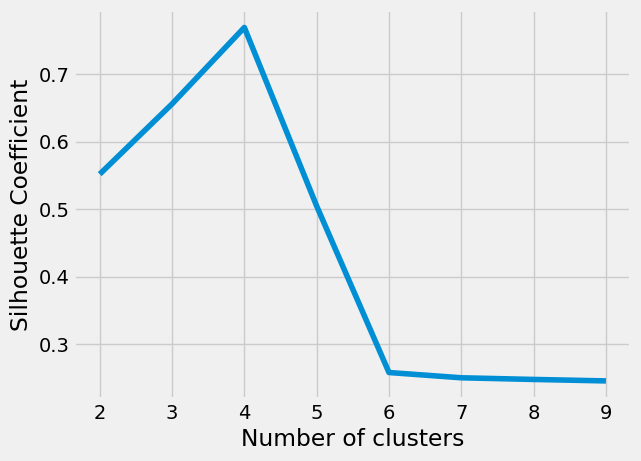

In [100]:
plot_selectK_silhoute(df_prep_norm,
                    k_min=2, 
                    k_max=10)

Para la agrupación con **K-Means**, seleccionamos **k = 4** como el número óptimo de clusters. Los resultados obtenidos muestran un **Silhouette Score** de **0.769**, lo que indica una buena separación entre los grupos y una estructura bien definida. Además, la **inercia** resultante es **9361.08**, lo que refleja la compactación de los datos dentro de cada cluster. Estos valores sugieren que la elección de **k = 4** es adecuada para representar la estructura de los datos de manera eficiente.

In [101]:
import matplotlib.cm as cm

def silhouette_analysis(X, model, k_min, k_max):
    """
    Genera gráficas con el coeficiente de la silueta para cada cluster y cada ejemplo
    
    Parametros:
    X : np.array
        El arreglo con los datos
    model : str
        "kmeans" o "kmedoids", especifica el modelo a entrenar.
    k_min : int
        Valor mínimo para k
    k_max : int
        Valor máximo para k
    """
    for n_clusters in range(k_min, k_max+1):
        if model == "kmeans":
            clusterer = KMeans(n_clusters=n_clusters, n_init=10, random_state=0)
        else:
            clusterer = KMedoids(n_clusters=n_clusters, random_state=0)
        
        # Entrenamos el modelo
        cluster_labels = clusterer.fit_predict(X)
        # Obtenemos el coeficiente promedio
        silhouette_avg = silhouette_score(X, cluster_labels)
        # Obtenemos el coeficiente para cada ejemplo
        sample_silhouette_values = silhouette_samples(X, cluster_labels)
        
        # Inicializamos una figura
        fig = plt.figure(figsize = (18, 7))
        plt.xlim([-0.2, 1])
        plt.ylim([0, len(X) + (n_clusters + 1) * 10])
        
        y_lower = 10
        for i in range(n_clusters):
            # Obtenemos los valores del coeficiente para cada cluster
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            # Ordenamos los valores de mayor a menor
            ith_cluster_silhouette_values.sort()
            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            plt.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )
            
            plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        plt.title(f"Método de la silueta (k={n_clusters})")
        plt.xlabel("Coeficiente")
        plt.ylabel("Cluster")
        
        # Incluimos el valor promedio
        plt.axvline(x=silhouette_avg, color="red", linestyle="--")
        plt.yticks([])
        plt.xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.show()

La gráfica de la silueta para **k = 4** muestra la distribución de los coeficientes de silueta para cada cluster. Se observa que los clusters tienen una buena cohesión y separación, con valores de silueta mayormente positivos. La línea roja punteada indica el coeficiente promedio de **0.769**, lo que confirma que la mayoría de las observaciones están bien agrupadas. Además, los clusters presentan una distribución uniforme en términos de tamaño, lo que sugiere que la elección de **k = 4** es adecuada para el conjunto de datos analizado.

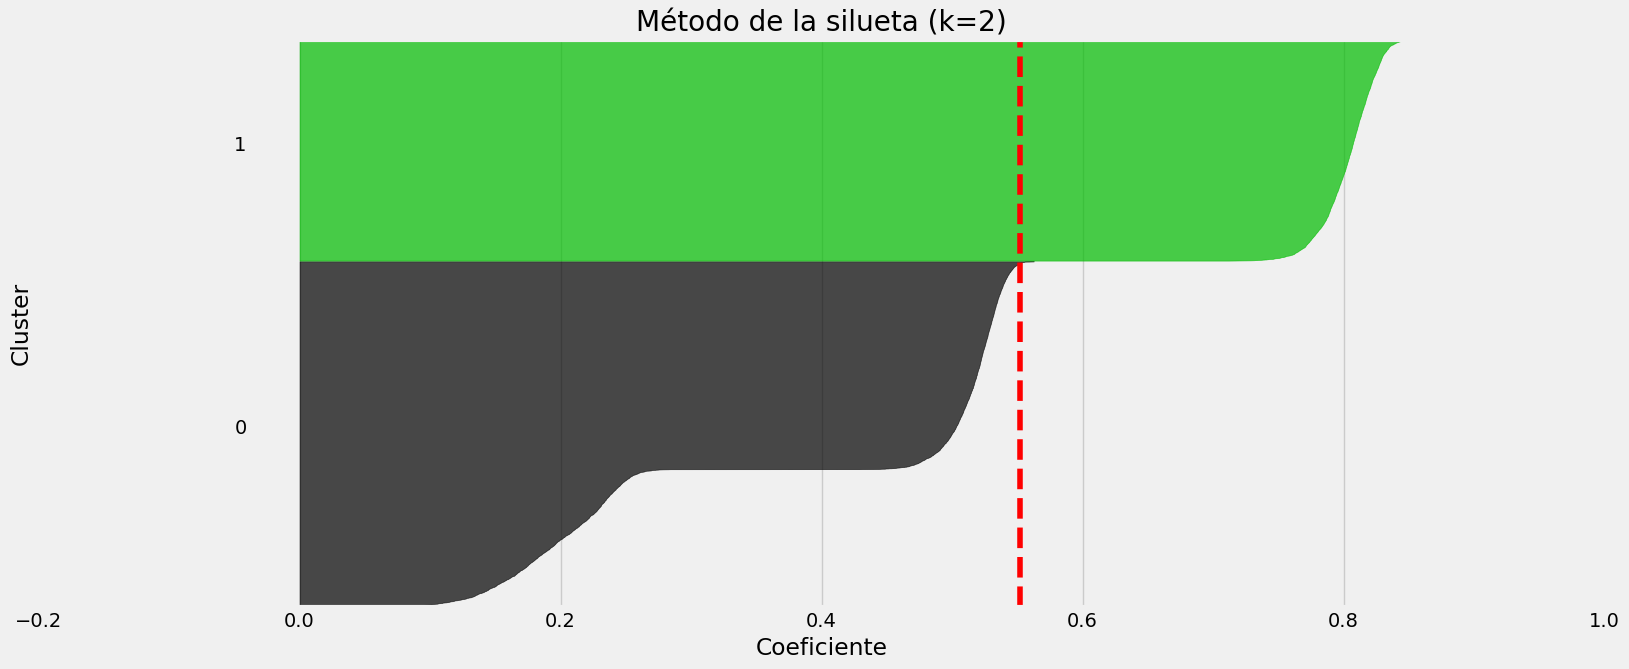

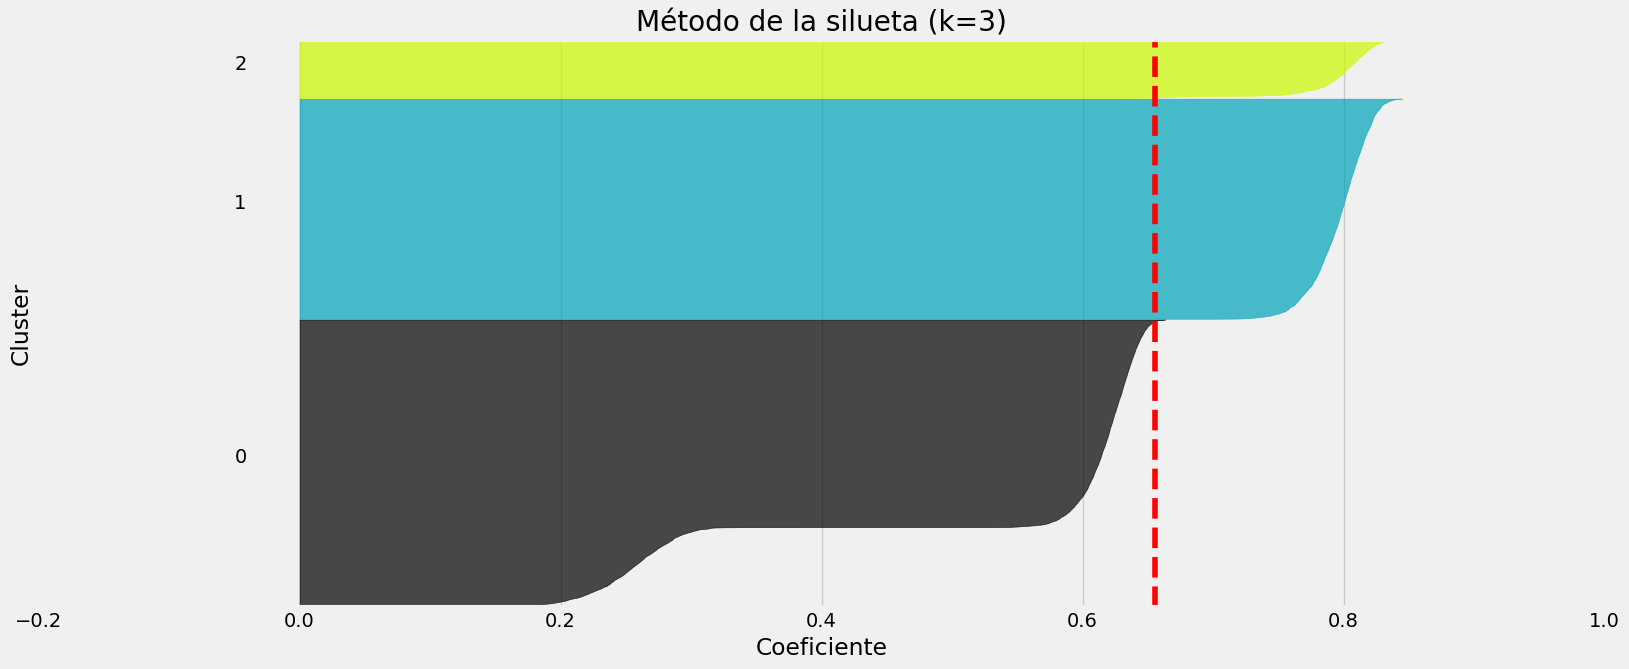

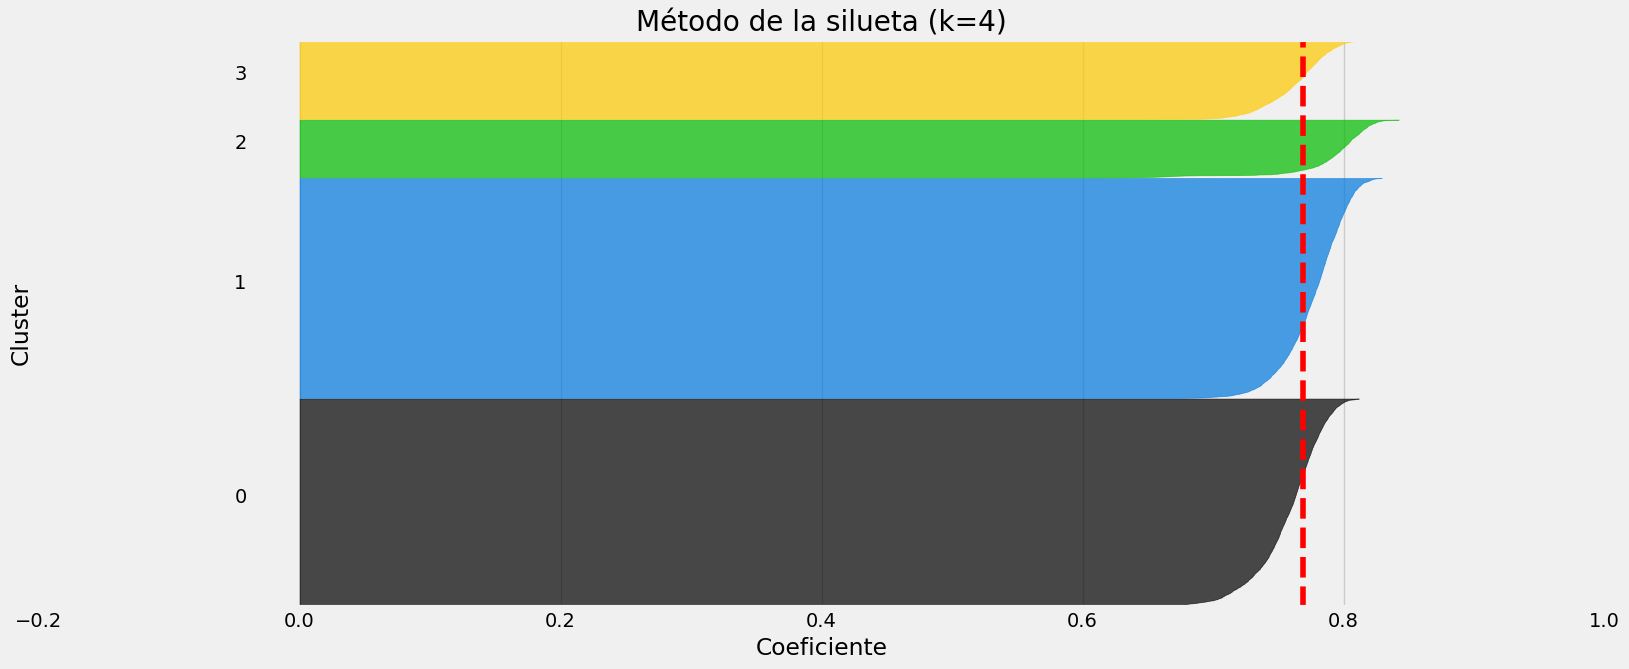

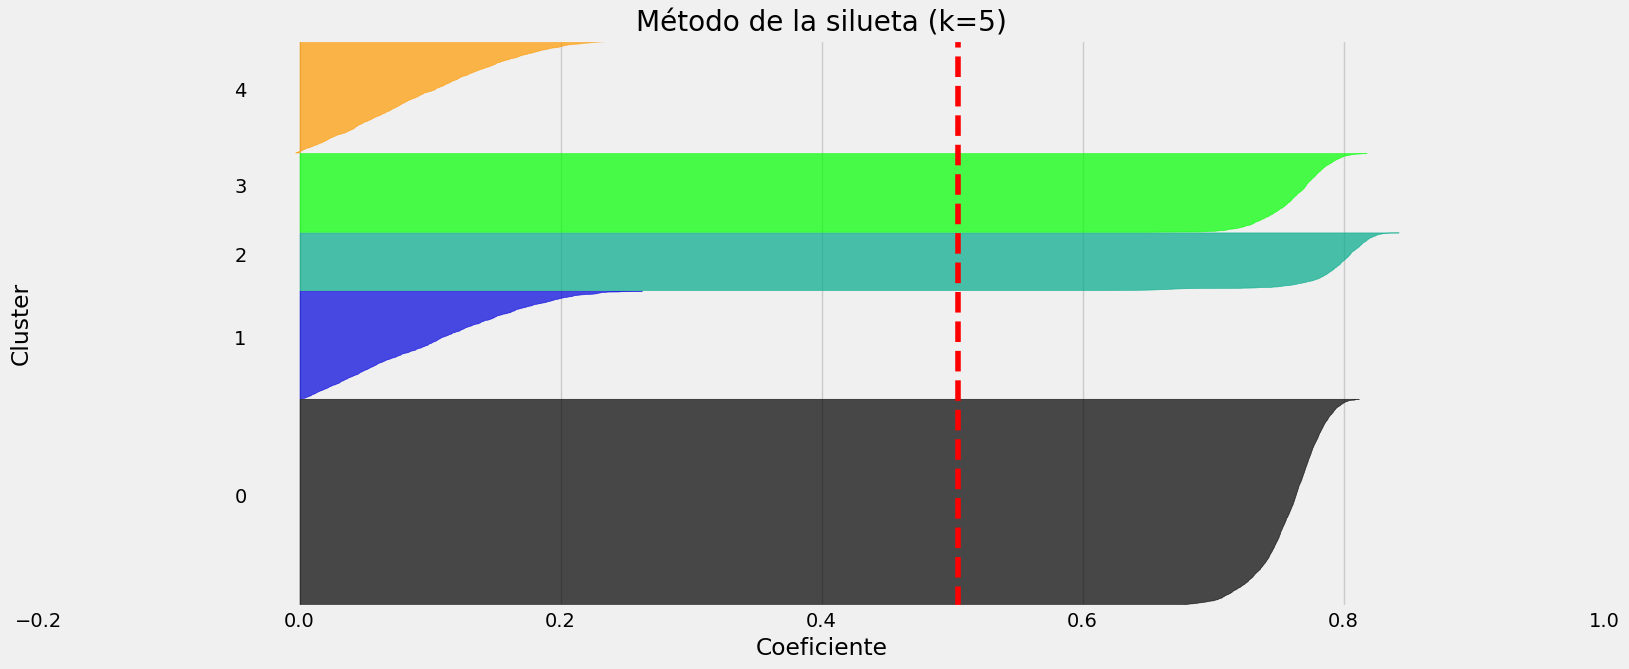

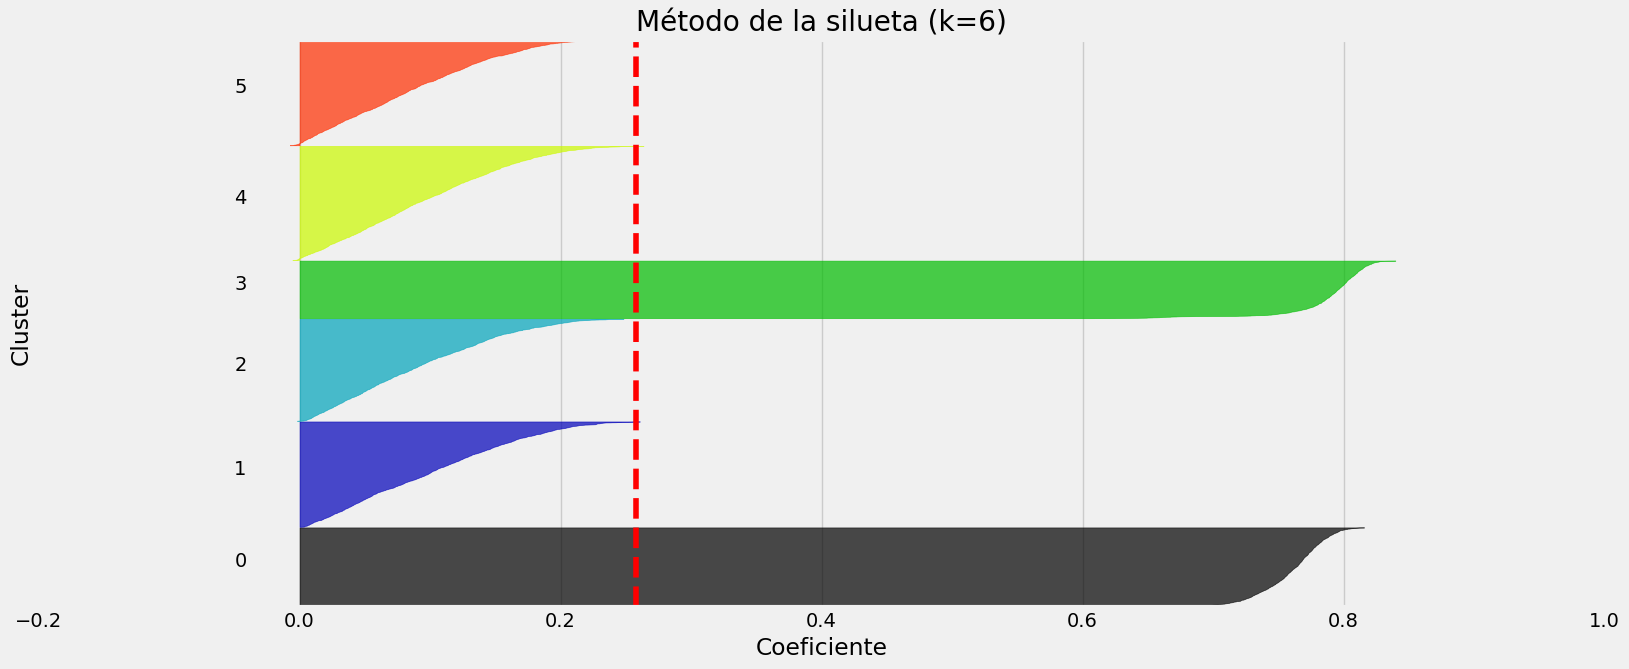

In [102]:
silhouette_analysis(df_prep_norm, "kmeans", 2, 6)

In [103]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(df_prep_norm)
score = silhouette_score(df_prep_norm, kmeans.labels_)
km = KMeans(n_clusters=4,
            init='k-means++',
            n_init=10,
            max_iter=300,
            random_state=0)
km.fit(df_prep_norm)
inercia = km.inertia_
print(f"Silhouette Score: {score}")
print(f"Inercia: {inercia}")

Silhouette Score: 0.7691671182261284
Inercia: 9361.079148130899


# 4.1 Analisis de resultados con el mejor modelo de K-Means

In [104]:
mejor_modelo = KMeans(n_clusters=4, n_init="auto", random_state=0)
mejor_modelo.fit(df_prep_norm)

KMeans(n_clusters=4, random_state=0)

El análisis de los resultados del modelo revela una distribución desigual de los datos entre los cuatro clusters identificados. El Cluster 1 es el más grande, con 3481 elementos, seguido de cerca por el Cluster 0, que contiene 3284 elementos. En contraste, el Cluster 3 y el Cluster 2 son significativamente más pequeños, con 1247 y 914 elementos, respectivamente.

In [105]:
labels = mejor_modelo.labels_
indexes, values = np.unique(labels, return_counts=True)

for i in range(len(indexes)):
    print(f"Cluster {indexes[i]}: {values[i]} elementos")

Cluster 0: 3284 elementos
Cluster 1: 3481 elementos
Cluster 2: 914 elementos
Cluster 3: 1247 elementos


In [ ]:
print(labels[:10])  #kmeans.labels_

[0 1 0 0 1 1 0 1 1 0]


([<matplotlib.axis.XTick at 0x14423cd90>,
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

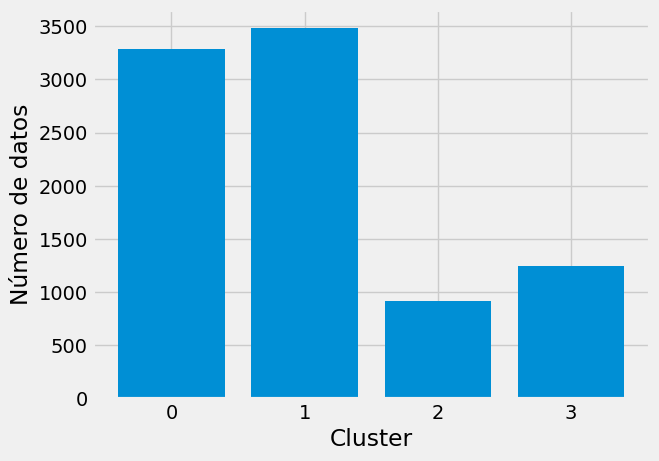

In [107]:
rects = plt.bar(indexes, values)
plt.xlabel('Cluster')
plt.ylabel('Número de datos')
plt.xticks(indexes)

### Análisis de datos por cluster

Se utiliza el objeto `standard_scaler` que definimos inicialmente para realizar una transformación inversa mediante el método `inverse_transform()`, lo que retornará el conjunto de datos en su escala original y poder analizarnos sin estar transformados y ser interpretables

In [108]:
# inverse_transform(data) retorna un arreglo de Numpy
datos_destransformados = standard_scaler.inverse_transform(df_prep_norm)
# Utilizaremos las columnas de la variable data para construir un DataFrame
datos_destransformados = pd.DataFrame(datos_destransformados, columns=df_prep_norm.columns)
# Si añadimos una columna con el resultado de la agrupación, 
# podremos interpretar el resultado fácilmente
datos_destransformados['Cluster'] = mejor_modelo.labels_
datos_destransformados

,SALDO,F_SALDO,COMPRAS,COMPRAS_PUNTUALES,COMPRAS_PLAZOS,AVANCE_EFECTIVO,F_COMPRAS,F_COMPRAS_PUNTUALES,F_COMPRAS_PLAZOS,F_AVANCE_EFECTIVO,P_AVANCE_EFECTIVO,P_COMPRAS,LÍMITE_CREDITO,PAGOS,PAGOS_MINIMOS,F_PAGOS_COMPLETOS,MESES_CLIENTE,Cluster
0,5323.148883,0.250693,26344.072200,38237.442520,3727.113162,15708.239680,0.496536,0.464442,0.821611,0.194502,100.0,77.0,16819.480040,21337.027460,39452.95812,0.817907,7.0,0
1,12726.638120,0.791307,37958.519020,5690.742440,18733.810960,38284.354430,0.699457,0.250327,0.654863,1.083902,78.0,156.0,15617.570580,8000.183624,63013.74848,0.343119,9.0,1
2,4305.572068,0.176531,28392.953340,36009.470090,2873.383232,14294.185030,0.419764,0.523662,0.899912,0.207049,72.0,81.0,15515.586210,27111.360490,48780.27175,0.829074,6.0,0
3,4740.988511,0.178076,27399.003840,38246.863490,3402.853375,6936.812518,0.439666,0.606597,0.783129,0.228299,78.0,83.0,12926.587970,23919.113400,38444.21998,0.883984,7.0,0
4,13820.920640,0.826914,42214.021630,7341.007821,19273.070990,40091.347850,0.821412,0.283579,0.501361,1.106350,88.0,182.0,14404.705070,6994.688474,62041.61734,0.383186,10.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8921,6095.221156,0.234346,27094.007820,35917.204380,3463.821376,11711.578890,0.469832,0.539477,0.828321,0.191030,75.0,101.0,17623.810280,23954.396950,34841.82989,0.866856,7.0,0
8922,12682.575820,0.686025,38433.618850,5293.541956,18924.799800,34444.867320,0.710331,0.276426,0.546059,0.935152,95.0,170.0,12433.814930,7375.625322,66726.37299,0.306600,10.0,1
8923,16464.311410,0.189136,4296.196384,32554.759640,11231.500430,15214.671560,0.424665,0.746010,0.690380,1.063788,51.0,151.0,3307.587117,22947.759220,54761.96221,0.129242,8.0,3
8924,15531.883780,0.117118,12219.325650,31795.971700,12390.432130,13856.393210,0.450670,0.805140,0.608737,1.058548,61.0,178.0,6148.232910,21369.503520,50368.30906,0.087448,8.0,3


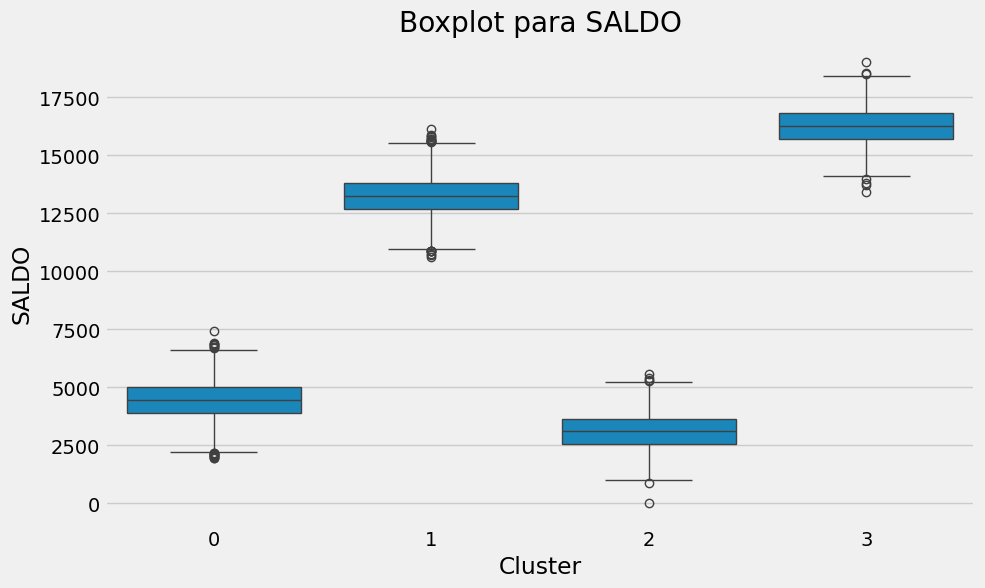

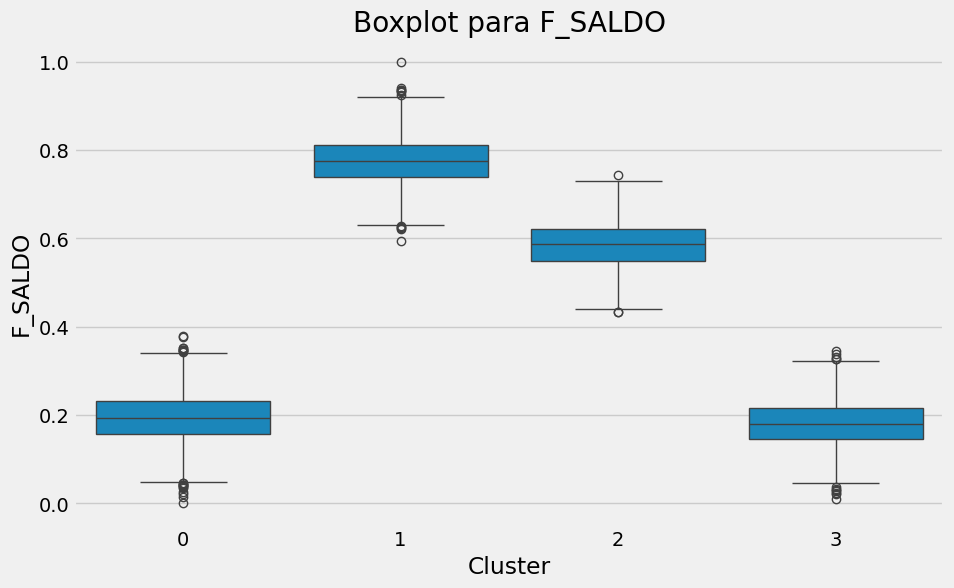

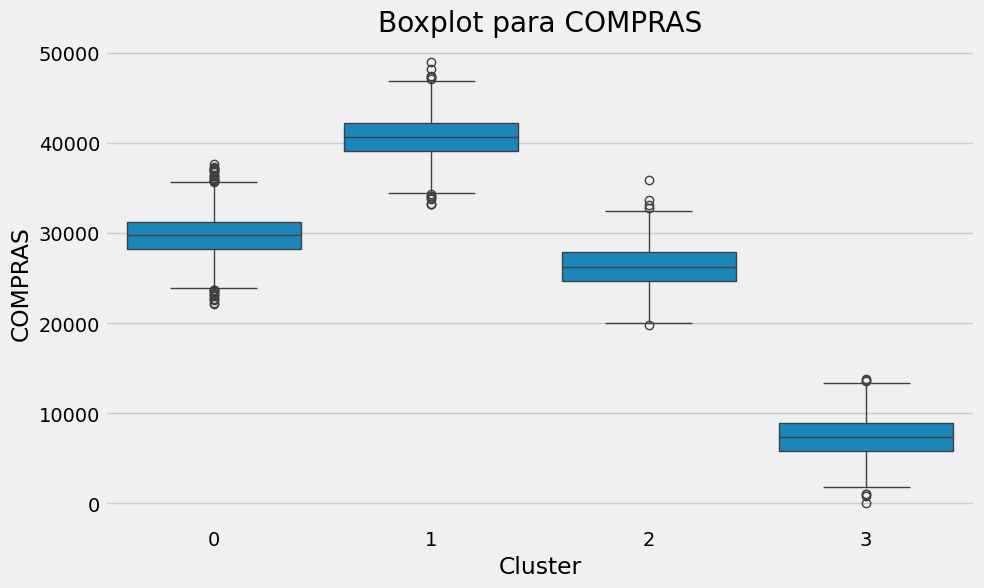

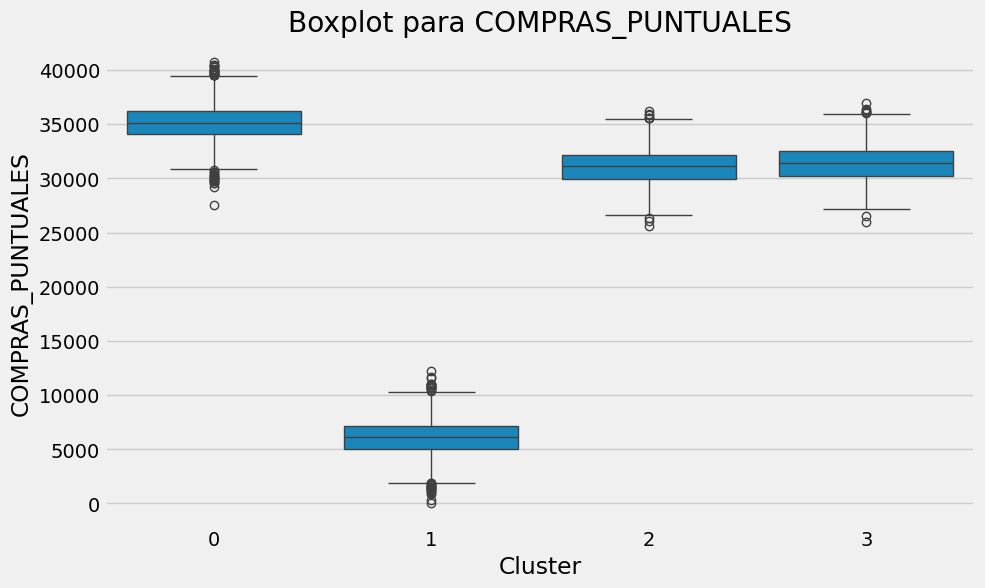

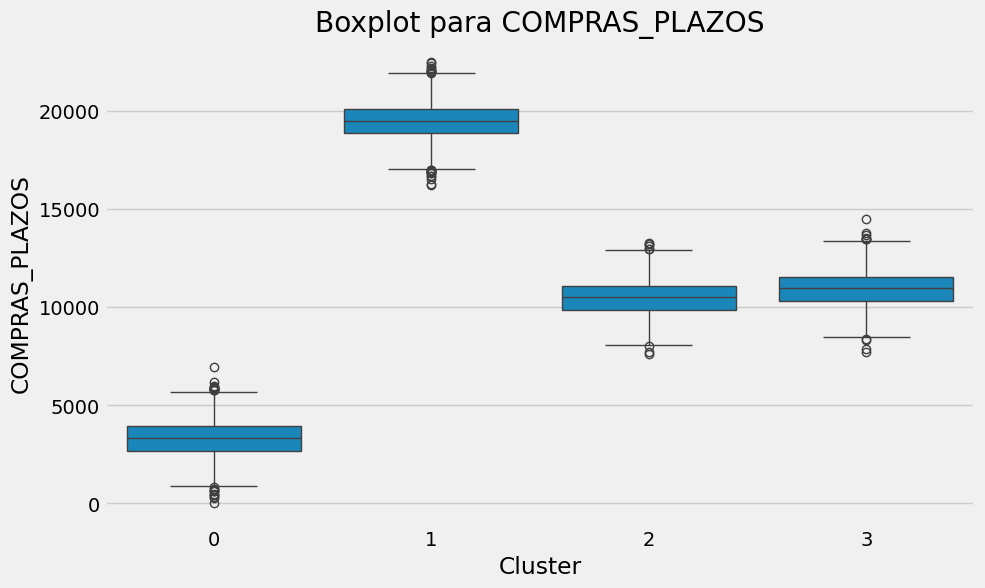

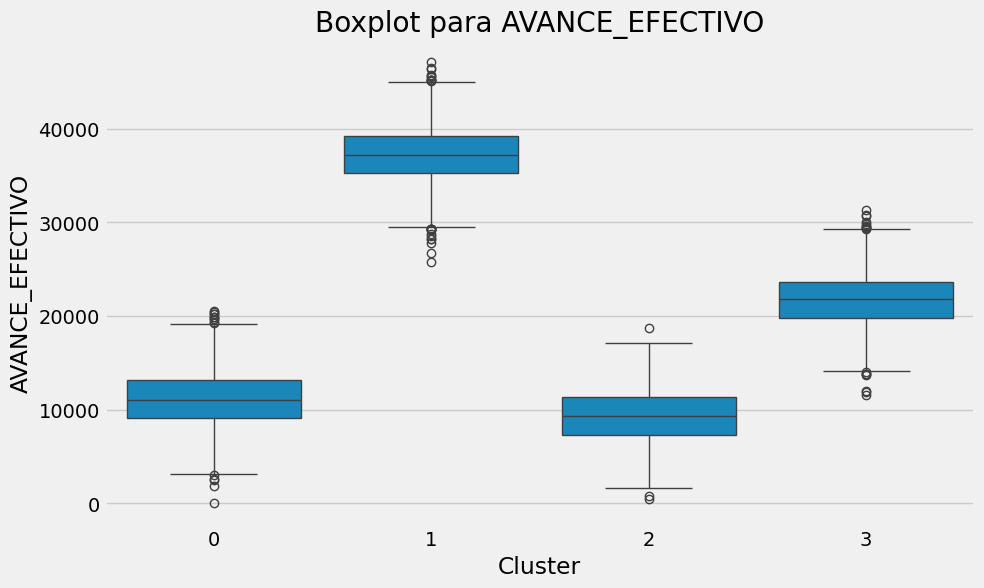

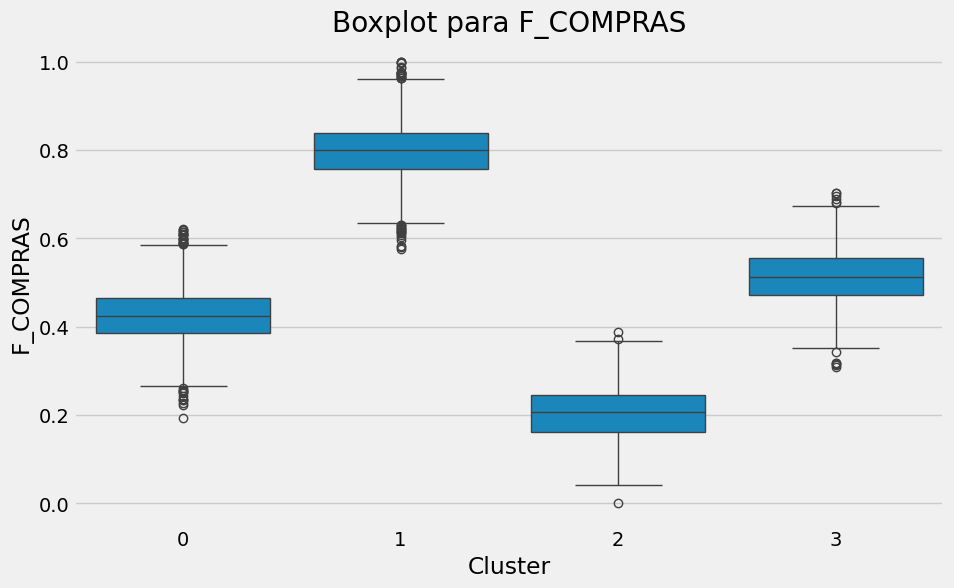

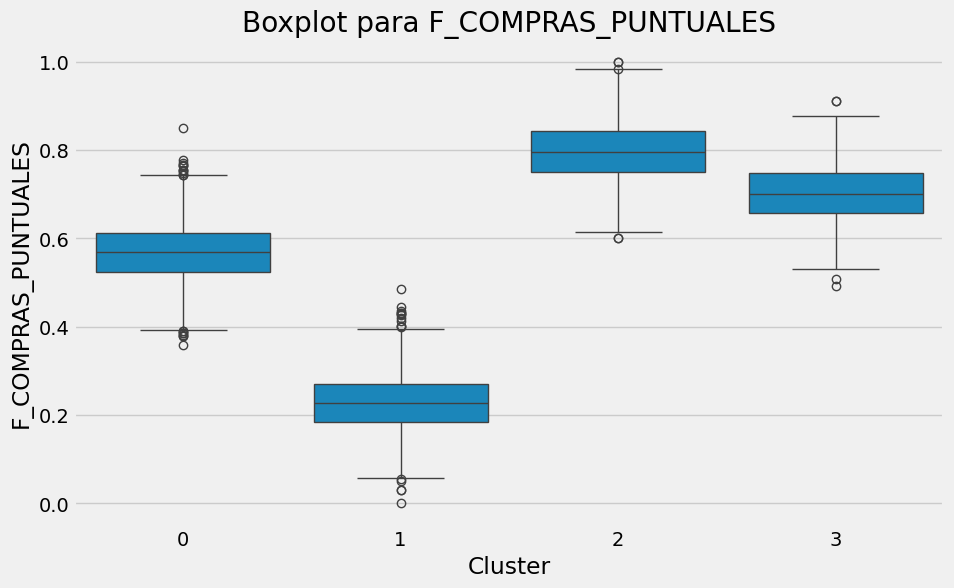

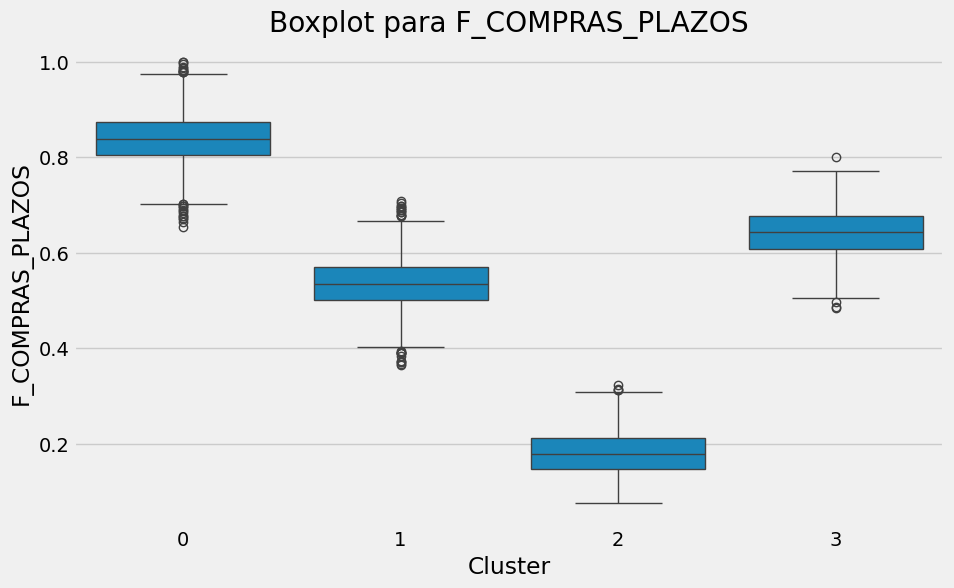

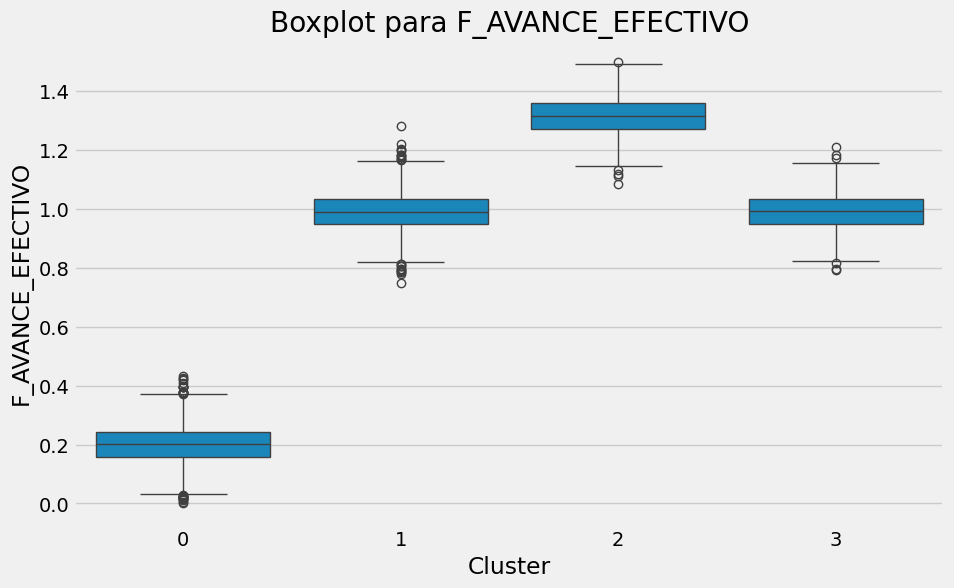

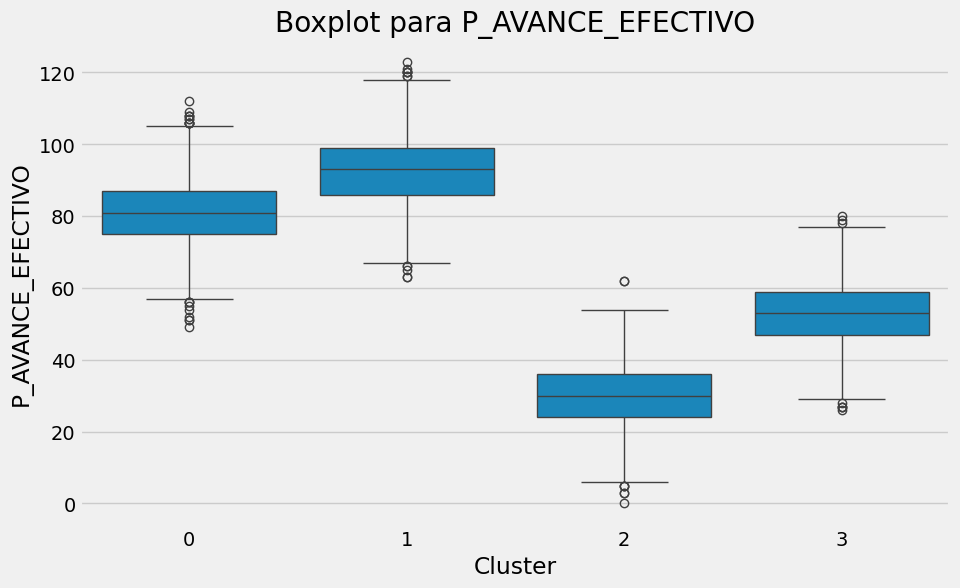

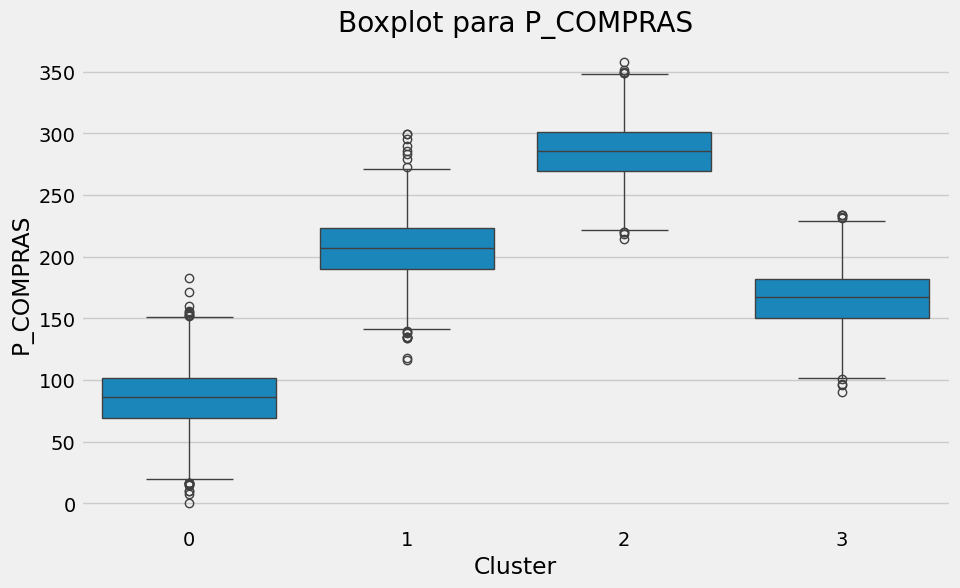

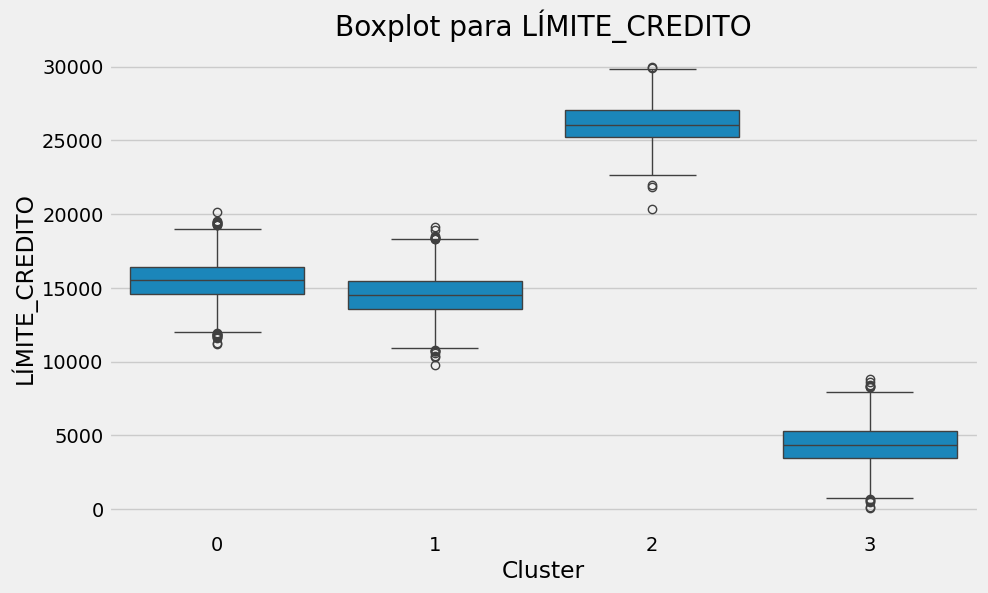

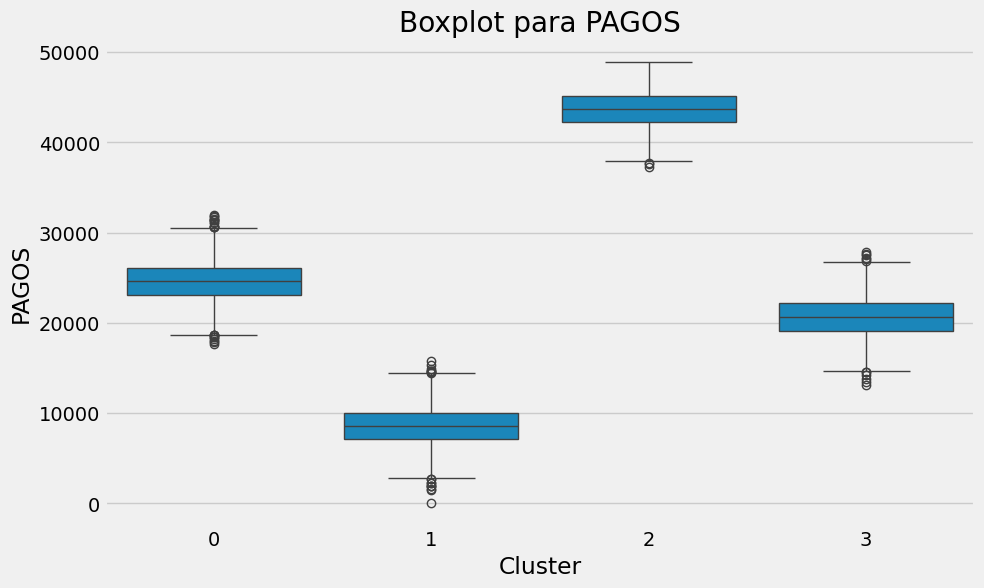

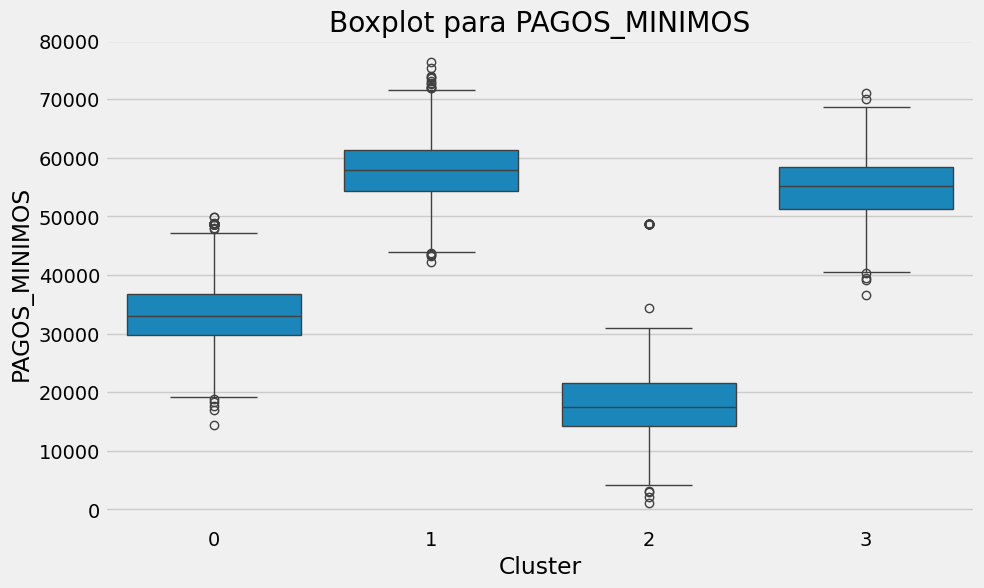

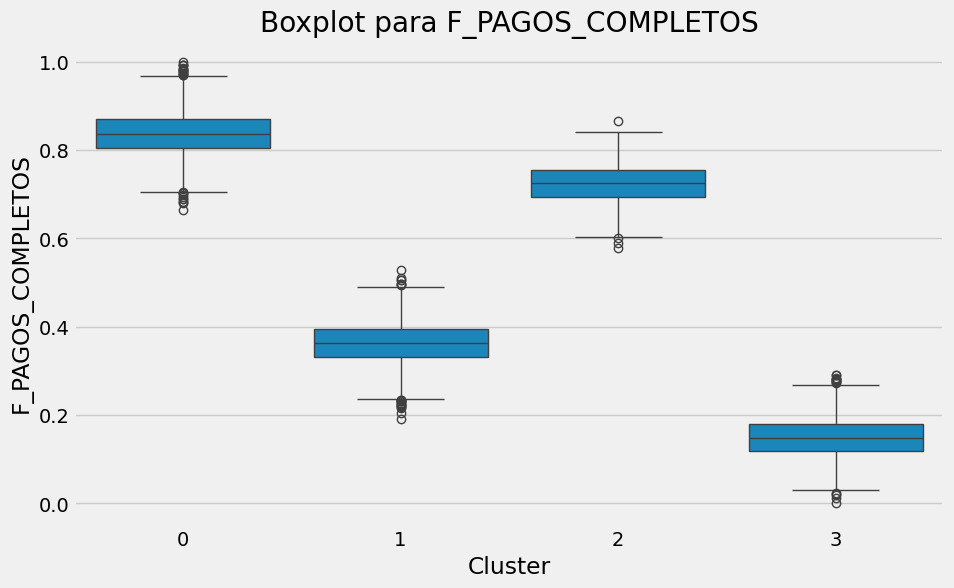

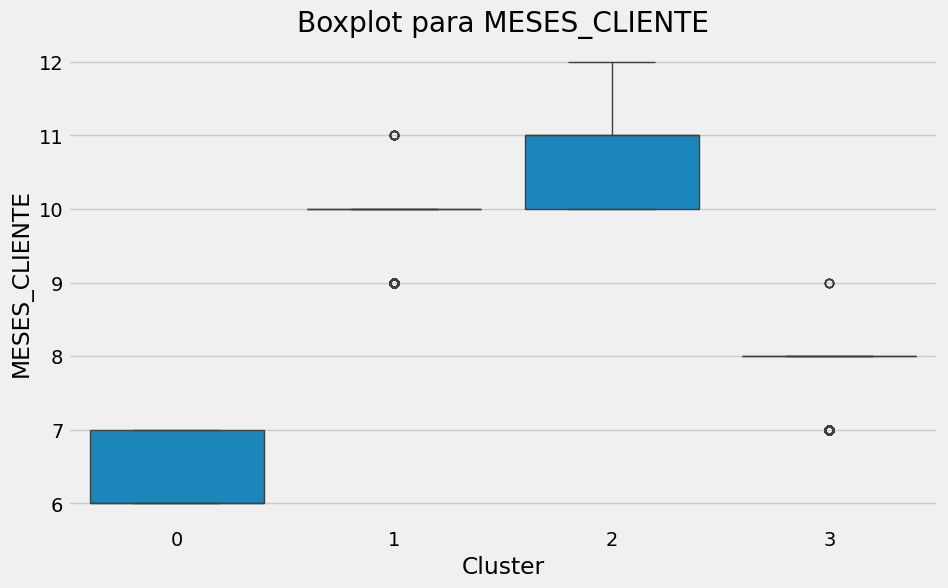

In [109]:
# Obtenemos las variables, ignorando la columna Cluster
columns = datos_destransformados.columns.drop(['Cluster'])
# Creamos un diagrama por cada variable
for column in columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster', y=column, data=datos_destransformados)
    plt.title(f'Boxplot para {column}')
    plt.show()

In [110]:
centroids_array = mejor_modelo.cluster_centers_
centroids_original = standard_scaler.inverse_transform(centroids_array)

In [111]:
centroids = pd.DataFrame(centroids_original, columns=df_prep_norm.columns)
centroids

,SALDO,F_SALDO,COMPRAS,COMPRAS_PUNTUALES,COMPRAS_PLAZOS,AVANCE_EFECTIVO,F_COMPRAS,F_COMPRAS_PUNTUALES,F_COMPRAS_PLAZOS,F_AVANCE_EFECTIVO,P_AVANCE_EFECTIVO,P_COMPRAS,LÍMITE_CREDITO,PAGOS,PAGOS_MINIMOS,F_PAGOS_COMPLETOS,MESES_CLIENTE
0,4452.026326,0.193595,29752.681785,35149.002826,3313.940095,11126.031098,0.425656,0.567211,0.838359,0.201014,80.929354,85.735079,15523.878752,24626.977335,33490.741166,0.837264,6.363276
1,13249.977641,0.775723,40669.368866,6131.485155,19462.497788,37230.719305,0.797962,0.227420,0.535079,0.990904,92.595519,206.924447,14538.133150,8557.495870,57810.055545,0.363766,9.858949
2,3112.948162,0.584993,26344.102866,31060.117500,10492.844824,9344.827413,0.206300,0.797213,0.180680,1.314655,29.807440,285.072210,26133.306637,43688.336038,18574.012798,0.723954,10.599562
3,16287.009528,0.180956,7392.854107,31419.508237,10930.971092,21758.726587,0.513903,0.702562,0.642635,0.990374,52.692061,166.350441,4364.170888,20649.268304,54976.490625,0.149811,7.826784


### Analisis Clusters 

- Cluster 0 (3284 clientes): Se caracteriza por un saldo medio mensual moderado pero bajo respecto a los demas clusters, con una frecuencia de compras puntual alta y frecuencia de compras a plazos elevada. Además, presentan bajos niveles de avance en efectivo, pero una frecuencia considerable de pagos completos.

- Cluster 1 (3481 clientes): Este grupo tiene un saldo medio mensual alto, con importes elevados en compras y avances en efectivo, así como una frecuencia alta de compras en general. Sin embargo, su frecuencia de pagos completos es baja, lo que sugiere que podrían estar financiando sus compras con pagos mínimos o plazos.

- Cluster 2 (914 clientes): Se caracteriza por un saldo medio mensual bajo y menores montos de compras y avances en efectivo. Su frecuencia de compras puntuales es alta, pero su frecuencia de compras a plazos es baja, lo que sugiere que prefieren pagar sus compras de inmediato en lugar de financiarlas.

- Cluster 3 (1247 clientes): Se caracteriza por tener el saldo mas alto, presenta altos valores en compras a plazos y avances en efectivo, junto con una frecuencia moderada de pagos completos. Este grupo podría estar compuesto por clientes que hacen un uso más intensivo de la línea de crédito y recurren con frecuencia a financiamientos.

# 5. Modelo de DBSCAN (Juan Esteban)

Para encontrar los parametros adecuados primero se utilizará vecino mas cercano para encontrar el eps ideal, es decir la distancia maxima a la cual 2 puntos (clientes) pueden estar y ser considerados del mismo grupo.

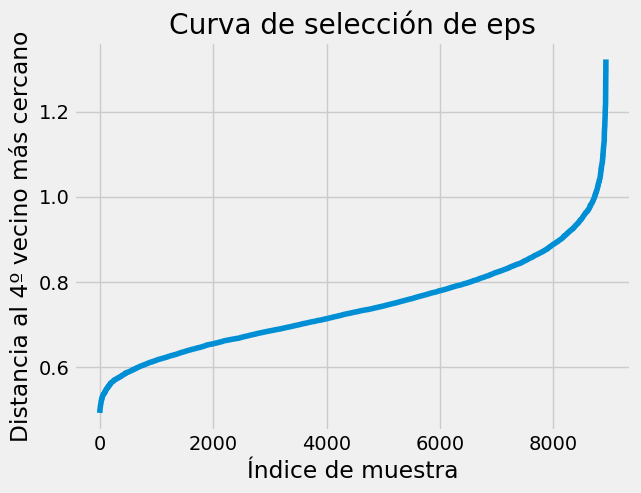

In [112]:
from sklearn.neighbors import NearestNeighbors

# Seleccionar los datos
X = df_prep_norm  # Asegúrate de que los datos estén normalizados

# Ajustar modelo k-NN con k = min_samples (suele ser 4 o 5)
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

# Ordenar las distancias de los puntos más cercanos
distances = np.sort(distances[:, 4])  # Tomamos la 4ta distancia (porque k=5)
plt.plot(distances)
plt.xlabel("Índice de muestra")
plt.ylabel("Distancia al 4º vecino más cercano")
plt.title("Curva de selección de eps")
plt.show()


En este caso la grafica nos da indicios de que el eps puede estar entre 0.4 y 0.6 o entre 0.9 y 1.2 aproximadamente ya que estos son los puntos donde la grafica tiene cambios drasticos.
Para identificar el mejor eps se probara el algoritmo con estos parametros y se decidirá cual es el mejor con el detodo de la silueta.

[np.float64(-0.5710069239930985), np.float64(-0.6474887312756068), np.float64(0.6873604069670283), np.float64(0.7228140465783669), np.float64(0.723738680618813), np.float64(0.5750015620152057)]


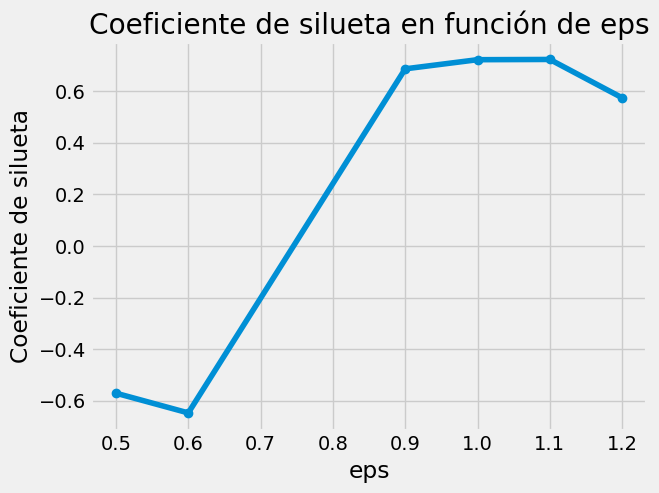

In [113]:
from sklearn.cluster import DBSCAN

eps = [0.4, 0.5, 0.6, 0.9, 1, 1.1, 1.2]
coef_silueta = []

for e in eps:
    dbscan = DBSCAN(eps=e, min_samples=5)
    labels = dbscan.fit_predict(X)  # Obtener etiquetas
    
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)  # Contar clusters (sin el ruido)
    
    if n_clusters > 1:  # Solo calcular Silhouette si hay más de 1 cluster
        coef_silueta.append(silhouette_score(X, labels))
    else:
        coef_silueta.append(None)  # Si hay solo 1 cluster, poner None

# Graficar solo los valores válidos
valid_eps = [e for i, e in enumerate(eps) if coef_silueta[i] is not None]
valid_scores = [s for s in coef_silueta if s is not None]
print(valid_scores)

plt.plot(valid_eps, valid_scores, marker='o')
plt.xlabel("eps")
plt.ylabel("Coeficiente de silueta")
plt.title("Coeficiente de silueta en función de eps")
plt.show()



Parece que el eps ideal es 1.1. Ahora hay que ajustar el parametro de min_samples que hace referencia a la cantidad minima de puntos (clientes) para que sean considerados grupo. Al ser bastantes datos se probara con diferentes valores altos en multiplos de 5.

[np.float64(0.7270870119090506), np.float64(0.7274194688326612), np.float64(0.7430785390979715), np.float64(0.7430785390979715), np.float64(0.7430785390979715)]


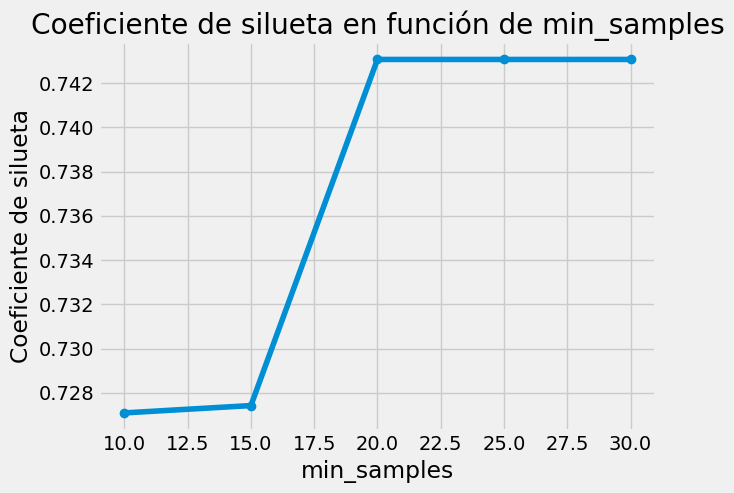

In [114]:
min_samples = [10, 15, 20, 25, 30]
coef_silueta2 = []

for m in min_samples:
    dbscan = DBSCAN(eps=1.1, min_samples=m)
    labels = dbscan.fit_predict(X)  # Obtener etiquetas
    
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)  # Contar clusters (sin el ruido)
    
    if n_clusters > 1:  # Solo calcular Silhouette si hay más de 1 cluster
        coef_silueta2.append(silhouette_score(X, labels))
    else:
        coef_silueta2.append(None)  # Si hay solo 1 cluster, poner None

# Graficar solo los valores válidos
valid_min_samples = [m for i, m in enumerate(min_samples) if coef_silueta2[i] is not None]
valid_scores2 = [s for s in coef_silueta2 if s is not None]
print(valid_scores2)

plt.plot(valid_min_samples, valid_scores2, marker='o')
plt.xlabel("min_samples")
plt.ylabel("Coeficiente de silueta")
plt.title("Coeficiente de silueta en función de min_samples")
plt.show()

Se ve que el mejor coeficiente se encuentra entre 20 y 30 datos, en donde el valor del coeficiente es el mismo por lo que se tomara 25 el cual es el dato de la mitad.

In [115]:
dbscan_final = DBSCAN(eps=1.1, min_samples=25)
dbscan_final.fit(X)

silhouette_final = silhouette_score(X, dbscan_final.labels_)

labels_final = dbscan_final.labels_
n_clusters = len(set(labels_final)) - (1 if -1 in labels_final else 0)
n_noise = list(labels_final).count(-1)

noise_percent = n_noise / len(labels_final) * 100

print(f"Número de clusters: {n_clusters}")
print(f"Puntos marcados como ruido: {n_noise}")
print(f"Porcentaje de ruido: {noise_percent:.2f}%")
print(f"Coeficiente de silueta: {silhouette_final}")

Número de clusters: 4
Puntos marcados como ruido: 46
Porcentaje de ruido: 0.52%
Coeficiente de silueta: 0.7430785390979715


Con los parametros encontrados se puede ver que se obtuvieron 4 grupos y hubo un ruido de 46. Esto quiere decir que 46 datos no fueron asignados a ningun grupo. Teniendo en cuenta la gran cantidad de datos, se puede concluir que este es un buen numero ya que solo representa el 0.52% de los datos. Finalmente se puede ver que con este, el mejor modelo encontrad, se obtuvo un coeficiente de silueta de 0.7430 lo cual inidica que en promedio los grupos estan bien definidos y separados.

In [116]:
datos_DBSCAN = datos_limpios3.copy()
datos_DBSCAN['Cluster'] = labels_final
datos_DBSCAN['Cluster'].value_counts()

Cluster
 1    3479
 0    3280
 3    1245
 2     876
-1      46
Name: count, dtype: int64

In [117]:
print(datos_DBSCAN['Cluster'].unique())

[ 0  1  2  3 -1]


          SALDO   F_SALDO      COMPRAS  COMPRAS_PUNTUALES  COMPRAS_PLAZOS  \
0   5323.148883  0.250693  26344.07220       38237.442520     3727.113162   
1  12726.638120  0.791307  37958.51902        5690.742440    18733.810960   
2   4305.572068  0.176531  28392.95334       36009.470090     2873.383232   
3   4740.988511  0.178076  27399.00384       38246.863490     3402.853375   
4  13820.920640  0.826914  42214.02163        7341.007821    19273.070990   

   AVANCE_EFECTIVO  F_COMPRAS  F_COMPRAS_PUNTUALES  F_COMPRAS_PLAZOS  \
0     15708.239680   0.496536             0.464442          0.821611   
1     38284.354430   0.699457             0.250327          0.654863   
2     14294.185030   0.419764             0.523662          0.899912   
3      6936.812518   0.439666             0.606597          0.783129   
4     40091.347850   0.821412             0.283579          0.501361   

   F_AVANCE_EFECTIVO  P_AVANCE_EFECTIVO  P_COMPRAS  LÍMITE_CREDITO  \
0           0.194502              

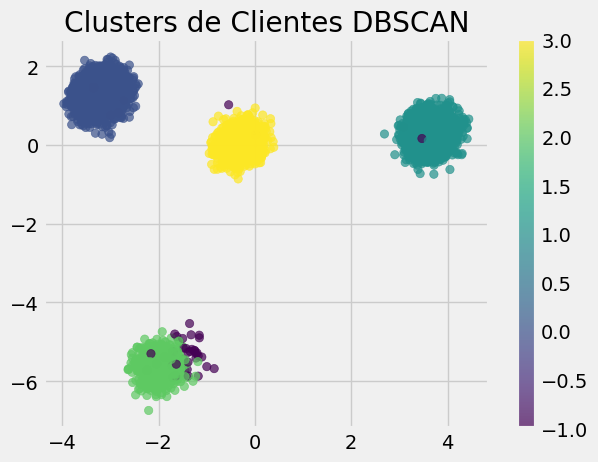

In [118]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
print(datos_DBSCAN.head())

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=datos_DBSCAN['Cluster'].astype(int), cmap='viridis', alpha=0.7)
plt.title('Clusters de Clientes DBSCAN')
plt.colorbar()
plt.show()


In [119]:
# Agrupar clientes por grupo
clientes_agrupados = datos_DBSCAN.groupby('Cluster')

# Media de los valores de las variables por grupo
media_variables = clientes_agrupados.mean()
media_variables

,SALDO,F_SALDO,COMPRAS,COMPRAS_PUNTUALES,COMPRAS_PLAZOS,AVANCE_EFECTIVO,F_COMPRAS,F_COMPRAS_PUNTUALES,F_COMPRAS_PLAZOS,F_AVANCE_EFECTIVO,P_AVANCE_EFECTIVO,P_COMPRAS,LÍMITE_CREDITO,PAGOS,PAGOS_MINIMOS,F_PAGOS_COMPLETOS,MESES_CLIENTE
Cluster,,,,,,,,,,,,,,,,,
-1,4490.336517,0.549681,26259.921335,30409.214329,10366.063063,10704.279447,0.261154,0.734407,0.261234,1.208826,36.869565,258.500000,24018.651256,39156.658476,46523.929545,0.703721,10.065217
0,4451.115803,0.193544,29753.920094,35147.513744,3314.746988,11128.001020,0.425772,0.567281,0.838414,0.200988,80.934146,85.722866,15521.876957,24628.798230,33476.017407,0.837281,6.362805
1,13250.584313,0.775718,40670.019589,6131.429886,19462.303677,37232.264671,0.798049,0.227404,0.535084,0.990877,92.590112,206.943087,14538.716522,8557.975177,57812.625748,0.363761,9.858867
2,3102.932227,0.584753,26340.895204,31066.898400,10485.822568,9357.469272,0.205709,0.797579,0.181076,1.313833,29.922374,285.013699,26122.416428,43695.703273,17383.051756,0.723426,10.602740
3,16285.618760,0.180978,7396.660605,31416.532338,10931.061133,21760.556035,0.513892,0.702679,0.642646,0.990388,52.654618,166.396787,4365.925082,20650.696559,54982.821428,0.149762,7.826506


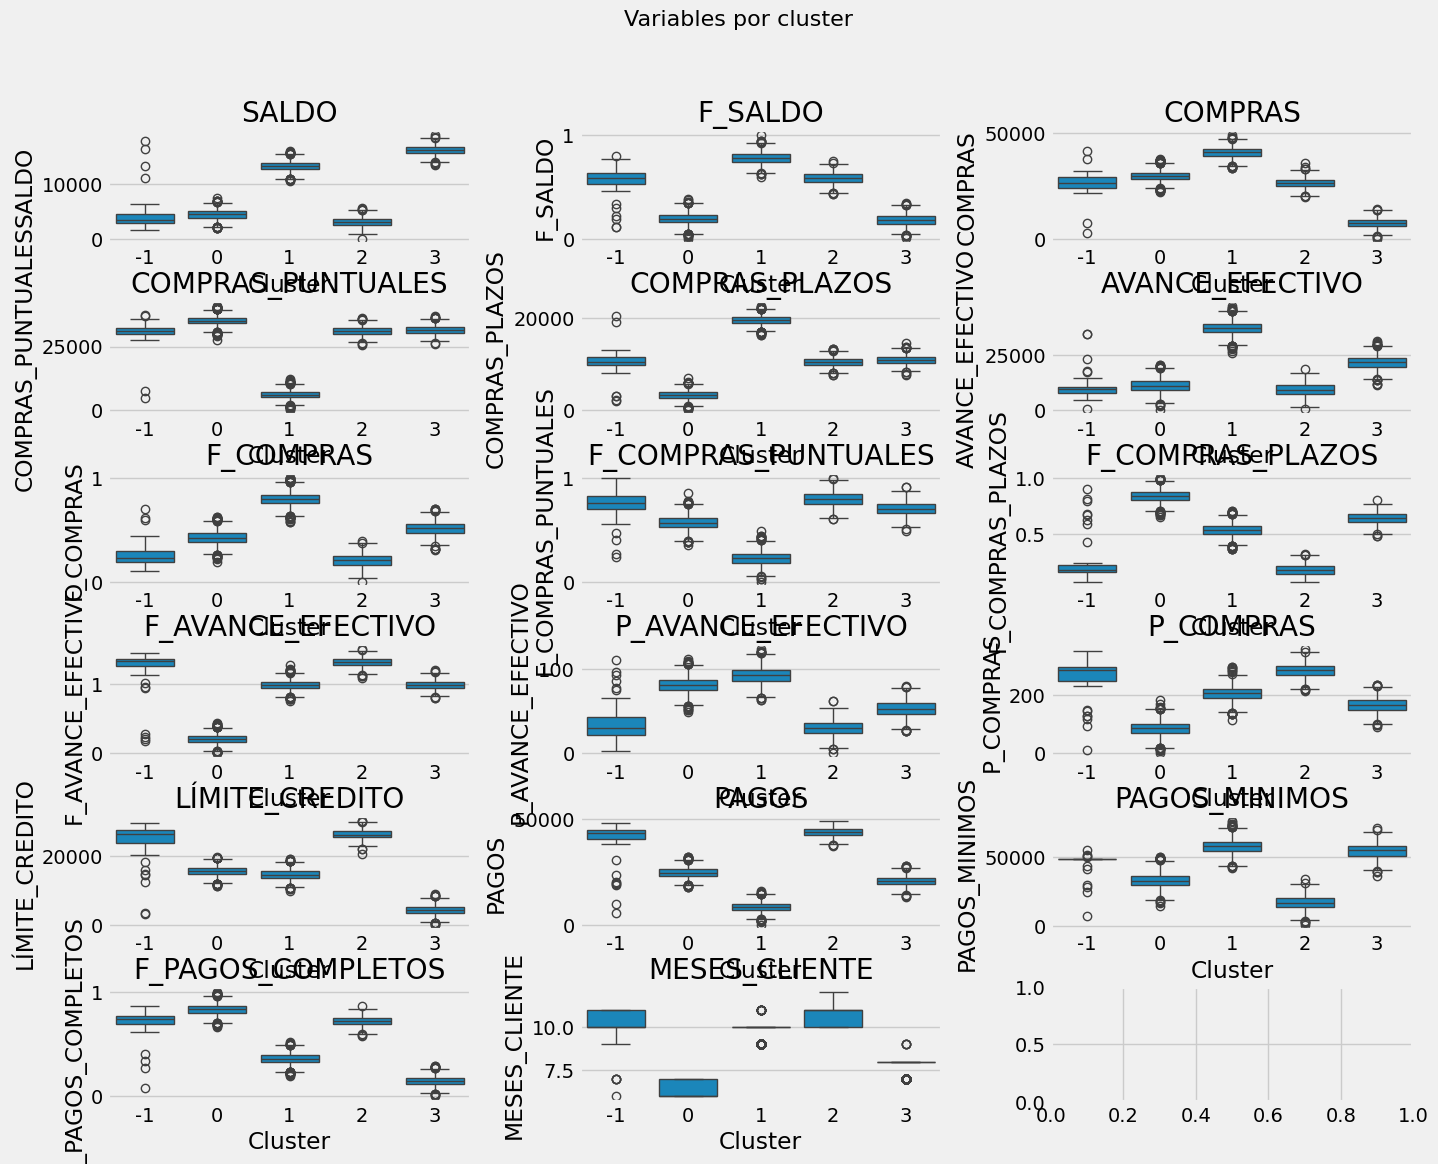

In [120]:
# Boxplot de las variables por grupo
fig, axes = plt.subplots(6, 3, figsize=(15, 12))
fig.subplots_adjust(hspace=0.5, wspace=0.3)
for ax, col in zip(axes.flat, media_variables.columns):
    sns.boxplot(x='Cluster', y=col, data=datos_DBSCAN, ax=ax)
    ax.set_title(col)
plt.suptitle("Variables por cluster", fontsize=16)
plt.show()

### Analisis de clusters 
Cluster 0 (3,280 clientes): Los clientes en este grupo se caracterizan por tener un saldo promedio bajo respecto a los grupos 1 y 3 con un limite de credito moderado de 15,521. Por otro lado suelen tener cumplas altas con un promedio de 29,753 y la mayoria son compras puntuales. Estos clientes tienen bajo uso de avances en efectivo, son clientes relativamente nuevos (6.36 meses en promedio) y tienen un porcentaje de pagos completos alto (83.7%). Con este analisis podemos decir que son clientes con un comportamiento financiero responsable dato su alto porcentaje de pago completo y el buen nivel de compras puntuales.

Cluster 1 (3,479): Contrario al cluster 0, los clientes en este grupo tienen un saldo alto con un promedio de 13,250 y limite de credito bajo relativo a los otros grupos. Este grupo sobresale ya que suele tener compras elevadas con un promedio de 40,670 con pocas compras puntuales (6,131). Tambien es un grupo que suele solicitar bastantes avances en efectivo y el porcentaje de pagos completos es bajo (36.3%). Estos son clientes que llevan un poco mas de tiempo como clientes. Con el analisis realizado se puede concluir que estos clientes tiene un perfil con un poco mas de resigo sobre todo por su porcentaje de pago completo y porque la frecuencia de compras es alta y su promedio de compras es alto.

Cluster 2 (876): Los clientes en este grupo tienen un saldo bajo con un promedio de 3,102, pero cuentan con un límite de crédito alto (26,122), lo que indica que tienen acceso a financiamiento considerable. Este grupo se caracteriza por realizar compras moderadas con un promedio de 26,340, destacando que la mayoría de ellas son compras puntuales (31,066). El uso de avances en efectivo es bajo en comparación con otros grupos (9,357), lo que sugiere que estos clientes dependen más de compras con su línea de crédito en lugar de retirar dinero en efectivo. Su porcentaje de pagos completos es moderado (72.3%), lo que indica un comportamiento financiero relativamente estable. Además, son clientes que llevan más tiempo en la empresa (10.6 meses). Con este analisis se puede concluir que este grupo tiene un perfil de clientes responsables con un bajo riesgo financiero.

Cluster 3 (16,285): Los clientes en este grupo tienen un saldo alto, con un promedio de 16,285, pero un límite de crédito bajo (4,365), lo que indica que su capacidad de financiamiento es restringida en comparación con otros grupos. Este grupo realiza pocas compras (7,396), pero destaca por un alto volumen de compras puntuales (31,416), lo que indica que, cuando gastan, lo hacen de manera específica y en montos significativos. Además, tienen un uso elevado de avances en efectivo (21,760), lo que sugiere una posible dependencia de este recurso para cubrir necesidades financieras. El porcentaje de pagos completos en este grupo es muy bajo (14.9%) y su tiempo como clientes es moderado (7.82 meses). Este grupo presenta un perfil de alto riesgo, ya que, a pesar de tener un saldo alto, su bajo límite de crédito y tienen un uso elevado de avances en efectivo. Además, su bajo porcentaje de pagos completos refuerza la idea de que podrían enfrentar dificultades para manejar su deuda.

## Mean_shift (Juan Diego Lozano Guerrero)

Mean Shift es un algoritmo de clustering no supervisado que no requiere definir el número de clústeres previamente, ya que los detecta en función de la densidad de los datos. Funciona desplazando cada punto hacia la región con mayor concentración de datos hasta que converge en un centro de clúster. Su ventaja es que puede detectar clústeres de formas arbitrarias y no asume una distribución específica, pero su principal desventaja es su alto costo computacional (O(n²)) y su sensibilidad al parámetro de radio (kernel).

In [121]:
from sklearn.cluster import mean_shift

cluster_centers, labels = mean_shift(X)

cluster_centers


array([[ 0.7529501 ,  1.11822494,  0.91666539, -1.23379915,  1.13470078,
         1.16131162,  1.11072221, -1.12753348, -0.43740266,  0.61027695,
         0.73588254,  0.5939057 , -0.02333308, -1.01768888,  0.88028708,
        -0.67705658,  0.8516279 ],
       [-0.96740579, -0.93657612, -0.07097852,  0.90216439, -1.14108162,
        -0.91209008, -0.6323172 ,  0.40657238,  1.03136584, -1.26151939,
         0.2090761 , -1.10950539,  0.1554633 ,  0.44262642, -0.72199273,
         1.0921913 , -1.14078853],
       [ 1.34681287, -0.98118768, -2.09389513,  0.62763834, -0.0676294 ,
        -0.06757323, -0.21916984,  1.01766558,  0.08348394,  0.60902109,
        -1.06602924,  0.0236064 , -1.86870527,  0.08115182,  0.69359744,
        -1.47651152, -0.30663793],
       [-1.22924982,  0.44498469, -0.37935616,  0.60118379, -0.12937362,
        -1.05356469, -1.65928833,  1.44500148, -2.15373219,  1.37746864,
        -2.09942512,  1.69233346,  2.07982106,  2.17482878, -1.70478247,
         0.66880479

In [ ]:
print(labels[:10]) #mean_shift.labels_

[1 0 1 1 0 0 1 0 0 1]


In [123]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

silhouette = silhouette_score(X, labels)

print(f"Silhouette Score: {silhouette}")



Silhouette Score: 0.7691671182261284


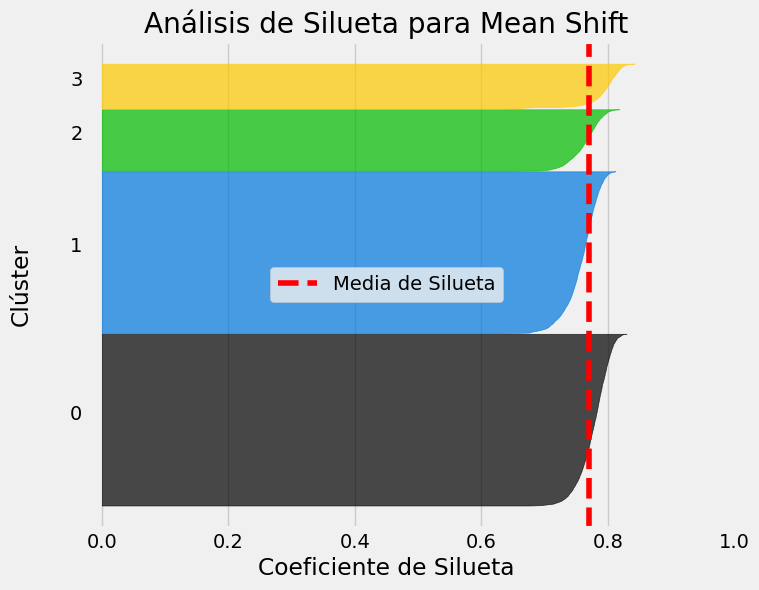

In [124]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples

# Calcular la puntuación de silueta de cada punto
silhouette_values = silhouette_samples(X, labels)
silhouette_avg = silhouette_score(X, labels)

# Número de clústeres 
n_clusters = len(np.unique(labels))

fig, ax = plt.subplots(figsize=(8, 6))
y_lower = 10

for i in range(n_clusters):
    cluster_silhouette_values = silhouette_values[labels == i]
    
    cluster_silhouette_values.sort()
    
    y_upper = y_lower + len(cluster_silhouette_values)
    
    color = cm.nipy_spectral(float(i) / n_clusters)
    
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
    
    ax.text(-0.05, y_lower + 0.5 * len(cluster_silhouette_values), str(i))
    
    y_lower = y_upper + 10  

ax.set_title("Análisis de Silueta para Mean Shift")
ax.set_xlabel("Coeficiente de Silueta")
ax.set_ylabel("Clúster")
ax.axvline(x=silhouette_avg, color="red", linestyle="--", label="Media de Silueta")
ax.set_yticks([])
ax.set_xlim([-0.1, 1])
ax.legend()
plt.show()


Inicialmente, se realizó un modelo sencillo de Mean Shift sin realizar una búsqueda de hiperparámetros, el parametro principl para realizar la busqueda de hiperparametros será el bandwidth el cual al no determinarlo usará una heurisitca basada en la media de distancia por pares. Esto tomará una complejudad cuadratica. 


La gráfica de silueta muestra la calidad del clustering obtenido, donde cada barra representa un clúster y su coeficiente de silueta. La línea roja indica la media del coeficiente de silueta (0.7691671182261284), que refleja la separación de los grupos formados.

#### mean_shift con busqueda de hiperparametros

In [ ]:
from sklearn.cluster import MeanShift
from sklearn.metrics import silhouette_score
import numpy as np

bandwidth_values = np.linspace(0.5, 3, 10) 
best_score = -1
best_bandwidth = None

for bw in bandwidth_values:
    mean_shift = MeanShift(bandwidth=bw)
    labels = mean_shift.fit_predict(X)
    
    if len(np.unique(labels)) > 1:  
        score = silhouette_score(X, labels)
        print(f"Bandwidth: {bw}, Silhouette Score: {score}")
        
        if score > best_score:
            best_score = score
            best_bandwidth = bw

print(f"\nMejor bandwidth: {best_bandwidth} con Silhouette Score: {best_score}")


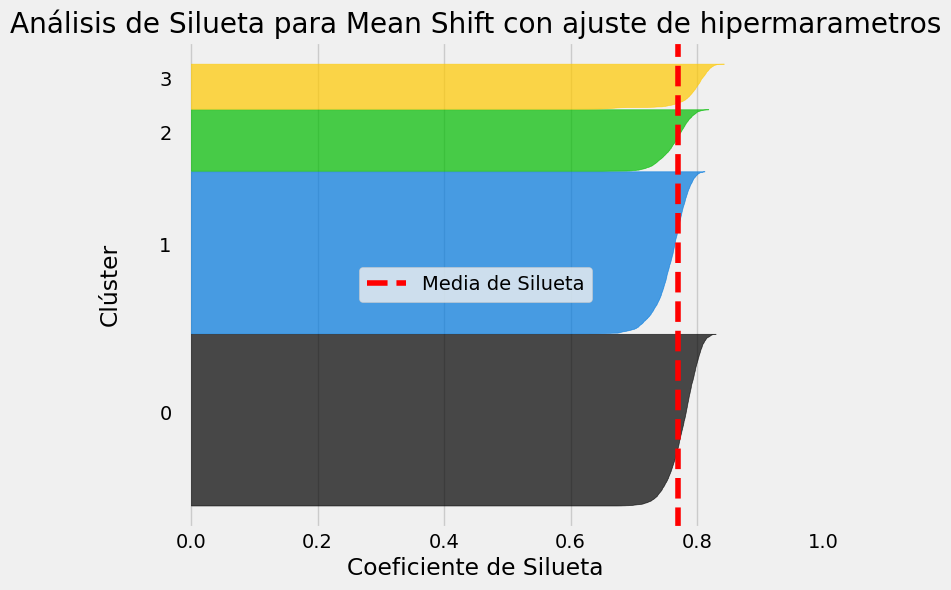

In [ ]:
from sklearn.cluster import mean_shift
cluster_centers, labels = mean_shift(X, bandwidth=best_bandwidth)
# Calcular la puntuación de silueta de cada punto
silhouette_values = silhouette_samples(X, labels)
silhouette_avg = silhouette_score(X, labels)

# Número de clústeres 
n_clusters = len(np.unique(labels))

fig, ax = plt.subplots(figsize=(8, 6))
y_lower = 10

for i in range(n_clusters):
    cluster_silhouette_values = silhouette_values[labels == i]
    
    cluster_silhouette_values.sort()
    
    y_upper = y_lower + len(cluster_silhouette_values)
    
    color = cm.nipy_spectral(float(i) / n_clusters)
    
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
    
    ax.text(-0.05, y_lower + 0.5 * len(cluster_silhouette_values), str(i))
    
    y_lower = y_upper + 10  

ax.set_title("Análisis de Silueta para Mean Shift con ajuste de hipermarametros")
ax.set_xlabel("Coeficiente de Silueta")
ax.set_ylabel("Clúster")
ax.axvline(x=silhouette_avg, color="red", linestyle="--", label="Media de Silueta")
ax.set_yticks([])
ax.set_xlim([-0.1, 1])
ax.legend()
plt.show()



Tras realizar una búsqueda de hiperparámetros, se utilizó un valor optimizado de bandwidth en Mean Shift, en lugar de dejarlo asignado con la heurisitca del algoritmo. Sin embargo, al analizar la gráfica de silueta, se observa que la calidad del clustering obtenido no ha cambiado con respecto al modelo inicial. La línea roja indica la media del coeficiente de silueta, que sigue reflejando una buena separación entre los grupos formados. Esto sugiere que la heurística utilizada por sklearn para estimar automáticamente el bandwidth es eficiente y encuentra un valor adecuado sin necesidad de un ajuste manual.

In [ ]:
datos_MEAN = datos_limpios3.copy()
datos_MEAN['Cluster'] = labels
datos_MEAN['Cluster'].value_counts()

Cluster
0    3481
1    3284
2    1247
3     914
Name: count, dtype: int64

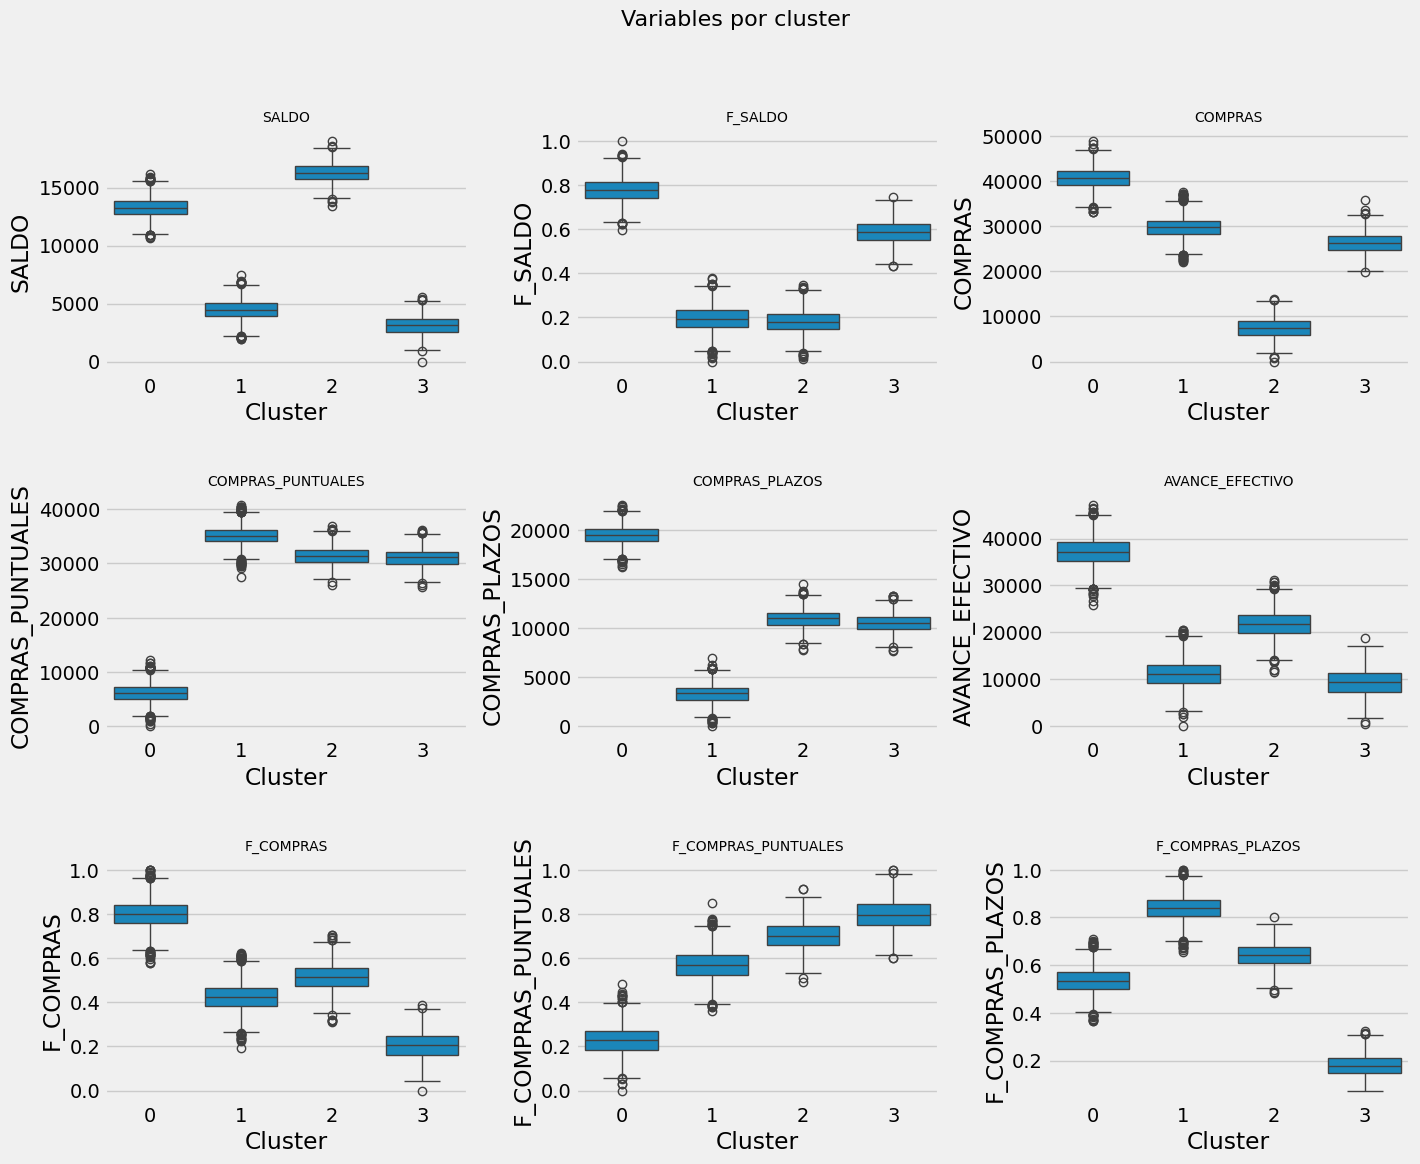

In [ ]:
# Boxplot de las variables por grupo
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.subplots_adjust(hspace=0.5, wspace=0.3)
for ax, col in zip(axes.flat, media_variables.columns):
    sns.boxplot(x='Cluster', y=col, data=datos_MEAN, ax=ax)
    ax.set_title(col, fontsize=10)  # Reducir tamaño y rotar títulos

plt.suptitle("Variables por cluster", fontsize=16)
plt.show()

Cluster 0 (3,481 clientes): Los clientes en este grupo tienen un saldo moderado con un límite de crédito alto. Realizan compras elevadas, principalmente compras puntuales, y tienen un bajo uso de avances en efectivo. Son clientes relativamente nuevos y presentan un alto porcentaje de pagos completos, lo que indica un comportamiento financiero responsable y confiable. Con este análisis, se puede concluir que estos clientes tienen un bajo riesgo financiero y son candidatos ideales para programas de fidelización y beneficios exclusivos.

Cluster 1 (3,284 clientes): Este grupo se caracteriza por tener un saldo alto y un límite de crédito moderado. Son clientes con alto consumo, pero una frecuencia menor de compras puntuales y un uso considerable de avances en efectivo. Aunque han estado más tiempo como clientes, su porcentaje de pagos completos es moderado, lo que indica cierta dependencia del crédito. Con el análisis realizado, se puede concluir que estos clientes representan un riesgo moderado, ya que su comportamiento financiero muestra alto consumo, pero un uso de crédito menos eficiente. Se recomienda monitorear su actividad y ofrecer estrategias de control de gastos.

Cluster 2 (1,247 clientes): Estos clientes tienen un saldo bajo, pero cuentan con un límite de crédito alto, lo que les permite acceso a financiamiento considerable. Realizan compras moderadas y, en su mayoría, compras puntuales. Su uso de avances en efectivo es bajo, lo que indica que prefieren utilizar su línea de crédito para compras en lugar de retirar dinero en efectivo. Además, tienen un buen porcentaje de pagos completos y llevan más tiempo en la empresa. Con este análisis, se puede concluir que estos clientes son estables y de bajo riesgo, con un buen manejo del crédito. Se recomienda mantener beneficios exclusivos y evaluar incrementos graduales en su línea de crédito.

Cluster 3 (914 clientes): Este grupo tiene un saldo alto, pero con un límite de crédito bajo, lo que sugiere restricciones en su capacidad de financiamiento. Realizan pocas compras, pero destacan por su alto uso de avances en efectivo, lo que indica una posible dependencia financiera de este recurso. Además, tienen un muy bajo porcentaje de pagos completos, lo que podría indicar dificultades para manejar su deuda. Con el análisis realizado, se puede concluir que estos clientes presentan un alto riesgo financiero, con una fuerte dependencia de avances en efectivo y baja capacidad de pago. Se recomienda restringir incrementos en la línea de crédito y ofrecer educación financiera o reestructuración de pagos.









### **Resumen y elección del algoritmo**  

Se evaluaron tres algoritmos de clustering: K-Means, DBSCAN y Mean Shift, utilizando el coeficiente de silueta como métrica de comparación. Los resultados obtenidos fueron los siguientes:  

- **K-Means**: Silhouette Score = 0.7691  
- **DBSCAN**: Silhouette Score = 0.7430  
- **Mean Shift**: Silhouette Score = 0.7691  

Los algoritmos K-Means y Mean Shift obtuvieron el mismo coeficiente de silueta, indicando que ambos producen clústeres con una estructura similar en términos de cohesión y separación de datos. Sin embargo, Mean Shift tiene un alto costo computacional debido a su complejidad cuadrática (**O(n²)**), lo que lo hace poco eficiente para grandes volúmenes de datos.  

Dado que K-Means logra la misma calidad de clustering con menor costo computacional, se elige este algoritmo para la segmentación final, permitiendo un procesamiento más eficiente y escalable en comparación con Mean Shift.
